In [368]:
# Install Genetic Algorithm Library
!pip install geneticalgorithm

In [1428]:
## Adam Bruce: January 1st, 2025
## This notebook houses the code for solving the primary problem for my capstone
## Primary Objective: Create six service zlusters (zones) for Turf Badger's Stevens Point branch where service clusters have a net technician takehome 
## AS CLOSE TO the average summed tech_takehome as possible! The optimization component since Tech Takehome between six clusters is 24999.17!
## With Constraint that minimum monthly income must be 20,000 USD
## and no more than 260 services in any single month

# Start by importing the data and importing libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga
new_space = lambda: print(" ")
import math

# Plotting imports
import seaborn as sns
from matplotlib import rcParams
from shapely.geometry import Point
%matplotlib inline
%matplotlib notebook

# Import Geopandas for geographical plotting!
import geopandas as gpd

# NOTE: Some code is commented out for clarity purposes. Uncomment to follow along with each step's testing phase.

# Import the cleaned dataset
SP_customers_clean = pd.read_csv('SP_Customers_Clean.csv')

# Drop the unnamed column... Not sure why this is here.
SP_customers_clean = SP_customers_clean.drop('Unnamed: 0', axis=1)

# look for 7, 8, 1, 3, 5, 6, 9

# Map the values to strings
SP_customers_clean['Start_Month'] = SP_customers_clean['Start_Month'].map({1:'01', 2:'02', 3:'03', 4:'04', 5:'05', 6:'06', 7:'07', 8:'08', 9:'09', 10:'10', 11:'11', 12:'12'})

## The first step is to create a dictionary based on Another constraint for the zones that each technician must
## not have more than 260 services in any MONTH. Thus, we must assign a dictionary for monthly services to each
## customer to total their service count by month for the year. By doing so, we can sum the service total per month
## for each customer within a zone later on to ensure the zones do not exceed the constraint.

# This will be completed using a function for assigning the service counts with dictionaries.
# The function takes in a dataframe, defines a month dictionary with service totals set to zero to start
# It then loops through the subscriptions and start month of each row and creates a total per month based on 
# the unique subscription type that adds to the total yearly services for that specific subscription!
# Note that 'Mosquito - Monthly' and 'Mosquito - Tri-Weekly' SubscriptiRUN ONLY FROM MAY TO SEPTEMBER EACH YEAR!
# Initially, we convert the Start_Month column to an int column with mapping!
pd.DataFrame(SP_customers_clean)

def monthly_service_count(df):
    Services_Per_Month = []
    
    # zip the subscriptions and start months into tuples!
    df['sub_start'] = list(zip(df.Subscription, df.Start_Month))
    sub_start_list = df['sub_start']
    
    # Checking where we are gaining values initially. This will be commented out.
    # NOTE: It was a duplication issue! The counts matched, but one line of code was duplicated, doubling its count in the dictionary for that service.
    
    
    # Commercial_Pest = 0
    # Commercial_RBB_Trapping = 0
    # Fertilization = 0
    # Lawn_Aeration = 0
    # Lawn_Fungicide = 0
    # Lawn_Grub_Control = 0
    # Lawn_Grub_Preventative = 0
    # Mosquito_Monthly = 0
    # Mosquito_Tri_Weekly = 0
    # Pest_Bi_Annual = 0
    # Pest_Bi_Monthly = 0
    # Pest_Eave_Overhang_Treatment = 0
    # Pest_German_Cockroach = 0
    # Pest_One_Time_Pest_Control = 0
    # Pest_Organic_Badger_Service_Plan = 0
    # Pest_Quarterly_Pest_Control = 0
    # Pest_Rodent_Bait_Box = 0
    # Pest_Tri_Annual_Pest_Control = 0 
    
    
    
    # loop through the tuples in sub start and assign the month values!
    # We take the subscription type with if statements, then the month start to do this
    for tup in sub_start_list:
        if tup[0] == 'Pest - Quarterly Pest Control':
            # Pest_Quarterly_Pest_Control += 1
            # Four Services Per Year Starting at sub_start
            if tup[1] in (["01", "04", "07", "10"]):
                service_months = ["01", "04", "07", "10"]
                total_services = [1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["02", "05", "08", "11"]):
                service_months = ["02", "05", "08", "11"]
                total_services = [1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["03", "06", "09", "12"]
                total_services = [1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))                  
        elif tup[0] == 'Mosquito - Monthly':
            # Mosquito_Monthly += 1
            # Regardless of start month the service months will always be May through September at 1 service for this Subscription!
            service_months = ["05", "06", "07", "08", "09"]
            total_services = [1, 1, 1, 1, 1]
            Services_Per_Month.append(dict(zip(service_months, total_services)))  
        elif tup[0] == 'Pest - Tri-Annual Pest Control':
            # Pest_Tri_Annual_Pest_Control += 1
            # Three Services Per Year Starting at Sub Start
            if tup[1] in (["01", "05", "09"]):
                service_months = ["01", "05", "09"]
                total_services = [1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["02", "06", "10"]):
                service_months = ["02", "06", "10"]
                total_services = [1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["03", "07", "11"]):
                service_months = ["03", "07", "11"]
                total_services = [1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["04", "08", "12"]
                total_services = [1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Fertilization':
            # Fertilization += 1
            # 5 Per Year Starting from Service Month
            if tup[1] == "01":
                service_months = ["01", "03", "05", "08", "10"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "02":
                service_months = ["02", "04", "06", "09", "11"]
                total_services = [1, 1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "03":
                service_months = ["03", "05", "07", "10", "12"]
                total_services = [1, 1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "04":
                service_months = ["04", "06", "08", "11", "01"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "05":
                service_months = ["05", "07", "09", "12", "02"]
                total_services = [1, 1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "06":
                service_months = ["06", "08", "10", "01", "03"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "07":
                service_months = ["07", "09", "11", "02", "04"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "08":
                service_months = ["08", "10", "12", "03", "05"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "09":
                service_months = ["09", "11", "01", "04", "06"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "10":
                service_months = ["10", "12", "02", "05", "07"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] == "11":
                service_months = ["11", "01", "03", "06", "08"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["12", "02", "04", "07", "09"]
                total_services = [1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Pest - Rodent Bait Box':
            # Pest_Rodent_Bait_Box += 1
            # Four Services Per Year Starting at sub_start
            if tup[1] in (["01", "04", "07", "10"]):
                service_months = ["01", "04", "07", "10"]
                total_services = [1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["02", "05", "08", "11"]):
                service_months = ["02", "05", "08", "11"]
                total_services = [1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["03", "06", "09", "12"]
                total_services = [1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Pest - One Time Pest Control': 
            # Pest_One_Time_Pest_Control += 1
            # One Per Year At Sub Start
            service_months = []
            service_months.append(tup[1])
            total_services = [1]
            Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Pest - Bi-Monthly':
            # Pest_Bi_Monthly += 1
            # Final Case is 'Pest - Organic Badger Service Plan', which is 6 per year (Bi-Monthly) from sub start
            if tup[1] in (["01", "03", "05", "07", "09", "11"]):
                service_months = ["01", "03", "05", "07", "09", "11"]
                total_services = [1, 1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["02", "04", "06", "08", "10", "12"]
                total_services = [1, 1, 1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Lawn - Grub Preventative':
            # Lawn_Grub_Preventative += 1
            # One Per Year At beginning of May!
            service_months = []
            service_months.append("05")
            total_services = [1]
            Services_Per_Month.append(dict(zip(service_months, total_services)))   
        elif tup[0] == 'Lawn - Fungicide':
            # Lawn_Fungicide += 1
            # Three Services Per Year Starting at Sub Start
            if tup[1] in (["01", "05", "09"]):
                service_months = ["01", "05", "09"]
                total_services = [1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["02", "06", "10"]):
                service_months = ["02", "06", "10"]
                total_services = [1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["03", "07", "11"]):
                service_months = ["03", "07", "11"]
                total_services = [1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["04", "08", "12"]
                total_services = [1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Pest - Bi-Annual':
            # Pest_Bi_Annual += 1
            # Two per year from start sub
            if tup[1] in (["01", "07"]):
                service_months = ["01", "07"]
                total_services = [1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["02", "08"]):
                service_months = ["02", "08"]
                total_services = [1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["03", "09"]):
                service_months = ["03", "09"]
                total_services = [1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["04", "10"]):
                service_months = ["04", "10"]
                total_services = [1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["05", "11"]):
                service_months = ["05", "11"]
                total_services = [1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["06", "12"]
                total_services = [1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Pest - Eave & Overhang Treatment':
            # Pest_Eave_Overhang_Treatment += 1
            # Four Services Per Year Starting at sub_start
            if tup[1] in (["01", "04", "07", "10"]):
                service_months = ["01", "04", "07", "10"]
                total_services = [1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            elif tup[1] in (["02", "05", "08", "11"]):
                service_months = ["02", "05", "08", "11"]
                total_services = [1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["03", "06", "09", "12"]
                total_services = [1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Commercial Pest':
            # Commercial_Pest += 1
            # 12 Per Year, One Every Month regardless of Sub Start
            service_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
            total_services = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
            Services_Per_Month.append(dict(zip(service_months, total_services)))  
        elif tup[0] == 'Mosquito - Tri-Weekly': 
            # Mosquito_Tri_Weekly += 1
            # 8 Per Year From May to September regardless of sub start
            service_months = ["05", "06", "07", "08", "09"]
            total_services = [2, 1, 2, 1, 2]
            Services_Per_Month.append(dict(zip(service_months, total_services)))   
        elif tup[0] == 'Lawn - Aeration':
            # Lawn_Aeration += 1
            # One Per Year At Sub Start
            service_months = []
            service_months.append(tup[1])
            total_services = [1]
            Services_Per_Month.append(dict(zip(service_months, total_services)))    
        elif tup[0] == 'Pest - German Cockroach':
            # Pest_German_Cockroach += 1
            # 12 Per Year, One Every Month regardless of Sub Start
            service_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
            total_services = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
            Services_Per_Month.append(dict(zip(service_months, total_services)))  
        elif tup[0] == 'Commercial RBB/Trapping': 
            # Commercial_RBB_Trapping += 1
            # 12 Per Year, One Every Month regardless of Sub Start
            service_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
            total_services = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
            Services_Per_Month.append(dict(zip(service_months, total_services)))
        elif tup[0] == 'Lawn - Grub Control':
            # Lawn_Grub_Control += 1
            # One Per Year At Sub Start
            service_months = []
            service_months.append(tup[1])
            total_services = [1]
            Services_Per_Month.append(dict(zip(service_months, total_services)))     
        else: 
            # Pest_Organic_Badger_Service_Plan += 1
            # Final Case is 'Pest - Organic Badger Service Plan', which is 6 per year (Bi-Monthly) from sub start
            if tup[1] in (["01", "03", "05", "07", "09", "11"]):
                service_months = ["01", "03", "05", "07", "09", "11"]
                total_services = [1, 1, 1, 1, 1, 1]
                Services_Per_Month.append(dict(zip(service_months, total_services)))
            else:
                service_months = ["02", "04", "06", "08", "10", "12"]
                total_services = [1, 1, 1, 1, 1, 1] 
                Services_Per_Month.append(dict(zip(service_months, total_services)))
    
    # Print the totals. Comment out once fixed.
    # DUPLICATION ISSUE! Found it thanks to this code. 
    # print(Commercial_Pest)
    # print(Commercial_RBB_Trapping)
    # print(Fertilization)
    # print(Lawn_Aeration)
    # print(Lawn_Fungicide)
    # print(Lawn_Grub_Control)
    # print(Lawn_Grub_Preventative)
    # print(Mosquito_Monthly)
    # print(Mosquito_Tri_Weekly)
    # print(Pest_Bi_Annual)
    # print(Pest_Bi_Monthly)
    # print(Pest_Eave_Overhang_Treatment)
    # print(Pest_German_Cockroach)
    # print(Pest_One_Time_Pest_Control)
    # print(Pest_Organic_Badger_Service_Plan)
    # print(Pest_Quarterly_Pest_Control)
    # print(Pest_Rodent_Bait_Box)
    # print(Pest_Tri_Annual_Pest_Control)
    # new_space()
    
    return Services_Per_Month     
    

# Get the resulting numbers and then print first 5 to check against the main dataset
month_dicts_results = monthly_service_count(SP_customers_clean)
N = 5
 
    
# using list slicing
# Get first N elements from list
# first_N = month_dicts_results[:N]
# print(SP_customers_clean.head(5))
# new_space()
# print(first_N)

## All seems to check. However, lets compare the size of the results to the number of rows in the dataset. They should match!

# Count of Customers in the dataset:
print(f'The number of Active customers is: {SP_customers_clean.shape[0]}')
# Count the size of the results list
print(f'The length of the results list is: {len(month_dicts_results)}')

## The initial check suggests we are gaining rows somehow. I will group by the services to see what the number for each should be
## then compare with internal print statements to see what is going on!
# NOTE: It was a duplication issue in a line of code! Debugging commented out in the function helped me find it!

#SP_Groups =  SP_customers_clean[['Subscription']]
#SP_Groups.groupby(['Subscription']).value_counts()


### Print for Comparing before to after!
#print(SP_customers_clean.head(3))
#new_space()

### Add the string columns for months to the dataset!
SP_customers_clean[["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]] = 0

# Loop through the rows of the clean data, then the dictionaries, and then assign the values to the columns based on keys!

dict_num = 0 # for tracking index where dict should be mapped
num_matches = 0



for index, row in SP_customers_clean.iterrows(): # loop through rows of dataset with indexes
    # Setup a list of months to check with keys
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    # index matcher!
    matching_dict = month_dicts_results[index] # get matching dict from list of dictionaries
    for key, value in matching_dict.items(): # loop through the key/value pairs of the matching dictionary 
        key = str(key)
        if key in months: # THIS SHOULD ALWAYS BE TRUE!
            SP_customers_clean.at[index, key] = value # Set the original column value at key to the number of services
        else:
            print(key)
            print("Something went wrong!") # Catching if something goes wrong
    dict_num += 1

### Now check that the values mapped!
#print(SP_customers_clean.head(3))
# Everything works!

## Finally create a "Yearly_Service_Total" column for the service total for each customer over the entire year
SP_customers_clean['Yearly_Service_Total'] = SP_customers_clean['01'] + SP_customers_clean['02'] + SP_customers_clean['03'] + SP_customers_clean['04'] + SP_customers_clean['05'] + SP_customers_clean['06'] + SP_customers_clean['07'] + SP_customers_clean['08'] + SP_customers_clean['09'] + SP_customers_clean['10'] + SP_customers_clean['11'] + SP_customers_clean['12']

## Drop the "Customer" Column! Sensitive information!
## Customer ID now only denotes who the customer is. 
SP_customers_clean = SP_customers_clean.drop(['Customer'], axis=1)


## Now that the data is completely prepped, we can move onto the optimization method in the next cell!

print(SP_customers_clean.head())

The number of Active customers is: 2282
The length of the results list is: 2282
   Cust_ID     City   Latitude  Longitude  Contract_Value  \
0    12842  Waupaca  44.328064 -89.170319          456.00   
1    17749   Manawa  44.465824 -88.915955          596.00   
2    17749   Manawa  44.465824 -88.915955          469.99   
3    18117  Waupaca  44.314514 -89.105927          800.00   
4    18329   Wausau  44.925732 -89.668442          360.00   

                     Subscription Subscription_Category Start_Month  \
0   Pest - Quarterly Pest Control                  PEST          11   
1   Pest - Quarterly Pest Control                  PEST          08   
2              Mosquito - Monthly                  MOSQ          08   
3   Pest - Quarterly Pest Control                  PEST          11   
4  Pest - Tri-Annual Pest Control                  PEST          03   

   Tech_Takehome                             sub_start  ...  04  05  06  07  \
0          63.84   (Pest - Quarterly Pest Contr

The average income for six clusters would be: 24999.17
 
Number of Datapoints: 2282
Number of clusters: 6
Sum of Tech Takehome in each cluster:  [ 8142.43 34545.58 36514.68 32366.01 16829.88 21596.45]
Sum of Yearly Services in each cluster:  [ 482 2085 2285 1979 1069 1314]
Radial Compactness value for each cluster: [11.25147107 72.47591977 31.69385425 32.74468014 21.68934824 53.89376431]
The standard deviation for technician income of the starter solution is: 10331.801488316578
 


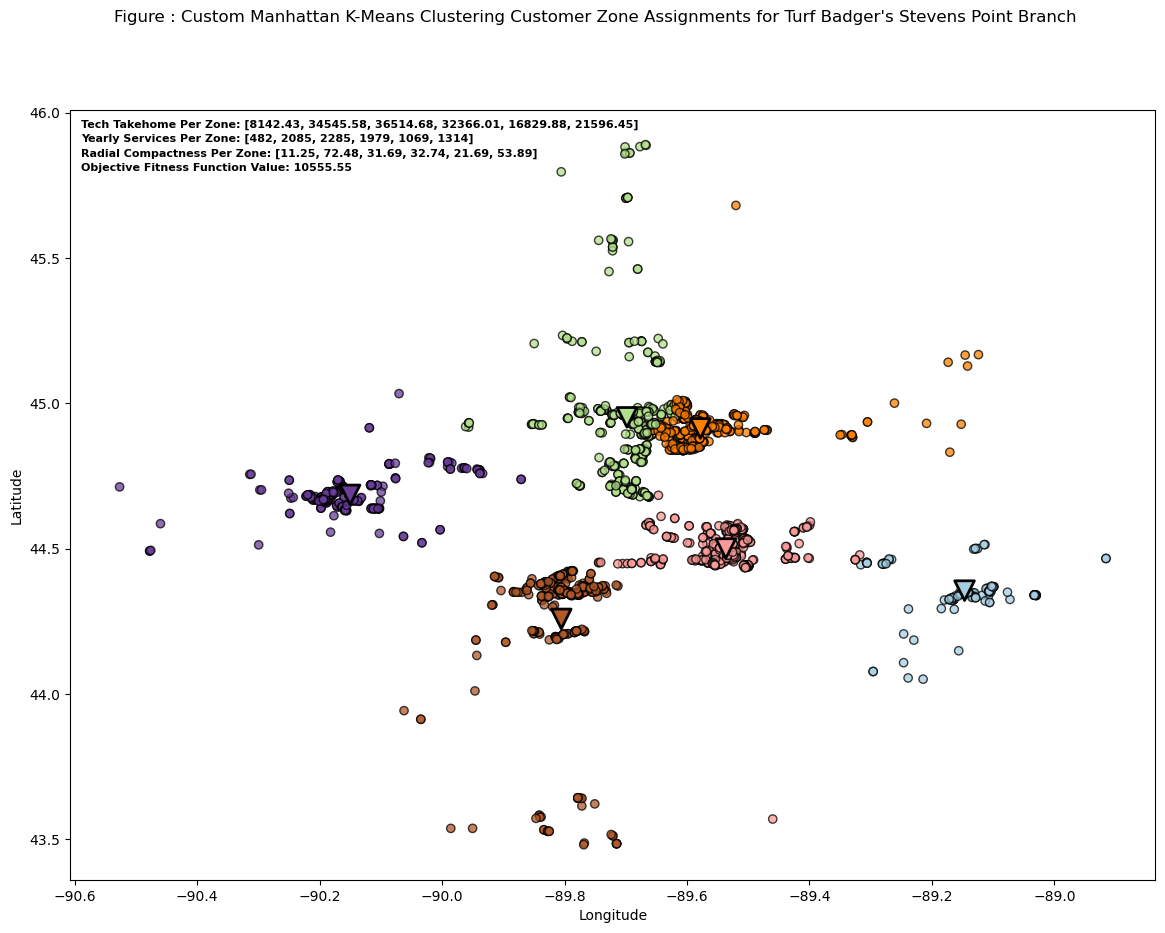

In [1215]:
from sklearn import preprocessing

## Calculate the The averaged summed Tech Takehome
Average_Income = sum(SP_customers_clean['Tech_Takehome']/6)
print(f'The average income for six clusters would be: {Average_Income:.2f}')
new_space()

## First, we Grab latitude and longitude from our cleaned dataset! Longitude needs to be x!
SP_Coords = SP_customers_clean.loc[:,['Longitude', 'Latitude']]

## We also grab the Yearly Service Totals and Tech Takehome constraints!
SP_Constraints = SP_customers_clean.loc[:,['Tech_Takehome', 'Yearly_Service_Total']]

## We need to make the longitude and latitude points into lists of lists
## Then save as an np array for the multidimensional slicing in the distance calculation function for custom KMeans!
SP_points = [list(a) for a in zip(SP_Coords['Longitude'], SP_Coords['Latitude'])]
SP_points = np.array(SP_points)

######## Here, a custome K-Means Approach is built to work with Manhattan Distance abs(X1-X2) + abs(Y1-Y2)
######## The approach is outlined on GeeksforGeeks, as the sklearn implementation only works with Euclidean Distance
# SEE HERE! https://www.geeksforgeeks.org/how-to-use-custom-distance-functions-for-clustering/

#### A NOTE ON THE DISTANCE METHOD CHOSEN! Manhattan Distance = abs(x1 - x2) + abs(y1 - y2)
    
#This has also been called the "Manhattan" distance because it corresponds to
#distance travelled via perpendicular city streets. Distance via this metric averages
#about 25% larger (SEE PROJECT SOURCES: Smith, 1979)

# NOTE: The final solution is very sensitive to these initial centroids. Setting the seed is essential to repeat the solution
# However, changing the seed and running multiple new solutions could produce better results, but almost always will result
# in a value similar in the end due to finding the global solution being the objective of GA!
import numpy as np
np.random.seed(87)

# Custom Manhattan distance function
def custom_distance(p1, p2):
    return np.sum(np.abs(p1 - p2)) # Distance formula (see above)

# Assign clusters based on custom distance function
def assign_clusters(X, centroids):
    clusters = []
    for x in X: # For point in array of points
        distances = [custom_distance(x, c) for c in centroids] # Calculate the distance from point x to every centroid c
        clusters.append(np.argmin(distances)) # Append the minimum distance for point x to clusters!
    return clusters

# Compute new centroids as mean of assigned points
def compute_centroids(X, labels, k):
    centroids = []
    for i in range(k): # for each centroid required (6 for this problem
        points = X[np.array(labels) == i] # Grab all the points in X assigned with label i
        centroids.append(points.mean(axis=0)) #assign the mean of the points as the new centroid!
    return np.array(centroids)

# Main function to perform custom K-Means clustering
def k_means_custom(X, k, max_iter=100):
    centroids = X[np.random.choice(len(X), k, replace=False)] # randomly generate K initial centroids from the points
    for _ in range(max_iter):
        labels = assign_clusters(X, centroids) # Generate Labels
        new_centroids = compute_centroids(X, labels, k) # Calculate new centroids
        if np.all(centroids == new_centroids): # When the code stops producing new centroids break!
            break
        centroids = new_centroids # Update the centroids
    return labels, centroids # Retrun the results

#### Here we run the custom K-Means to generate a starter solution!

### For X we will use the latitude/longitude points from SP_points above
## We need 6 clusters!
SP_labels_initial, SP_centroids_initial = k_means_custom(SP_points, k=6)

# PRINT THE INITIAL LABELS AND CENTROIDS!
#print("Labels:", SP_labels_initial)
# print("Centroids:", SP_centroids_initial)


## Create an array with the cluster number, centroid longitude, and centroid latitude values for plotting!
labeled_centroids = np.array([[i,np.mean(SP_points[np.array(SP_labels_initial)==i][:,0]),
                     np.mean(SP_points[np.array(SP_labels_initial)==i][:,1])] for i in range(k)])


## Now add the labels to the capacity constraint dataset 
SP_Constraints['cluster_labels_initial'] = SP_labels_initial # Labels of each point

##### Now calculate the radial compactness of each cluster since this is a component of the fitness function later

# Get an array of radial compactness for each cluster
radial_compactness = np.empty(6) # Set empty array for six values (radial compactness for each of K clusters)

## Grab the initial labels
SP_Coords['cluster_labels_initial'] = SP_Constraints['cluster_labels_initial']

## Define the initial centroids
best_centroids = SP_centroids_initial

for i in range(k): # For each of six centroids
    radial_compactness_total_clusteri = 0
    SP_points_clusteri = SP_Coords[SP_Coords['cluster_labels_initial'] == i] # Get the coords for only the ith cluster!
    # Now we must convert the dataset to an array!
    SP_clusteri_array = [list(a) for a in zip(SP_points_clusteri['Longitude'], SP_points_clusteri['Latitude'])]
    SP_clusteri_array  = np.array(SP_clusteri_array) # THIS IS THE ARRAY OF COORDINATE POINTS BELONGING TO CLUSTER i
    if i == 0: # For the first cluster center we create the cluster center array
        current_cluster_center = list([[best_centroids[i][0], best_centroids[i][1]]]) # Extract the lat/long for the current cluster as a list to make a 1 by 2 array!
        cluster_centers = np.array(current_cluster_center) # Make the 1 by 2 array to match shape with best centroids and coords arrays
        for j in range(len(SP_clusteri_array)): # for each point assigned to the current centroid
            radial_j = math.sqrt((cluster_centers[i][0]-SP_clusteri_array[j][0])**2 + (cluster_centers[i][1]-SP_clusteri_array[j][1])**2) # radial compactness value for point j
            radial_compactness_total_clusteri += radial_j # Add to radial compactness the value for point j
        radial_compactness[i] = radial_compactness_total_clusteri # once totaled add it to the final array!
    else: # In all other cases we append to the cluster centers array!
        current_cluster_center = list([[best_centroids[i][0], best_centroids[i][1]]]) # Get the ith cluster centroid
        cluster_centers = np.r_[cluster_centers,current_cluster_center] # Append it to the list
        for j in range(len(SP_clusteri_array)): # for each point assigned to the current centroid
            radial_j = math.sqrt((cluster_centers[i][0]-SP_clusteri_array[j][0])**2 + (cluster_centers[i][1]-SP_clusteri_array[j][1])**2) # radial compactness value for point j
            radial_compactness_total_clusteri += radial_j # Add to radial compactness the value for point j
        radial_compactness[i] = radial_compactness_total_clusteri # once totaled add it to the final array





### Resulting Descriptions
print("Number of Datapoints:",len(SP_points))
print("Number of clusters:",k)
print("Sum of Tech Takehome in each cluster: ",np.array([sum(SP_Constraints[SP_Constraints['cluster_labels_initial'] == i]['Tech_Takehome']) for i in range(k)]))
print("Sum of Yearly Services in each cluster: ",np.array([sum(SP_Constraints[SP_Constraints['cluster_labels_initial'] == i]['Yearly_Service_Total']) for i in range(k)]))
print("Radial Compactness value for each cluster:", radial_compactness)

# Calculate the standard deviation value for technician income of the starter solution!
standard_dev_starter_solution = np.std(np.array([sum(SP_Constraints[SP_Constraints['cluster_labels_initial'] == i]['Tech_Takehome']) for i in range(k)]))
print("The standard deviation for technician income of the starter solution is: " + str(standard_dev_starter_solution))

### We see the clusters are very disproportionate in our variables and many violate the necessities! Thus, optimization is needed!

### Let's Plot the initial clusters and label capacity values
takehome_list = ([sum(SP_Constraints[SP_Constraints['cluster_labels_initial'] == i]['Tech_Takehome']) for i in range(k)])
rounded_takehome_list = [round(elem, 2) for elem in takehome_list ]
services_list = [sum(SP_Constraints[SP_Constraints['cluster_labels_initial'] == i]['Yearly_Service_Total']) for i in range(k)]
rounded_services_list = [round(elem, 2) for elem in services_list]

# Convert the array to a list using list()
radial_compactness_list = list(radial_compactness)
rounded_radial_compactness_list = [round(elem, 2) for elem in radial_compactness_list]

# HERE WE GET THE OBJECTIVE FITNESS FUNCTION VALUE FOR THIS INITIAL SOLUTION!

initial_KMeans_Fitness = np.std(np.array([sum(SP_Constraints[SP_Constraints['cluster_labels_initial'] == i]['Tech_Takehome']) for i in range(k)])) + np.sum(radial_compactness)


new_space()
%matplotlib inline
plt.figure(figsize=(14, 10))
plt.scatter(SP_points[:,0], SP_points[:,1],c=SP_labels_initial,cmap='Paired',edgecolors = 'black',alpha=0.75)
plt.scatter(labeled_centroids[:,1], labeled_centroids[:,2],c=labeled_centroids[:,0],cmap='Paired',edgecolors = 'black',linewidth=2,marker="v",s=200)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.suptitle("Figure : Custom Manhattan K-Means Clustering Customer Zone Assignments for Turf Badger's Stevens Point Branch", fontsize=12)
plt.annotate("Tech Takehome Per Zone: " + str(rounded_takehome_list), xy = (-90.59, 45.95), weight = "bold", fontsize= 8)
plt.annotate("Yearly Services Per Zone: " + str(rounded_services_list), xy = (-90.59, 45.90), weight = "bold", fontsize= 8)
plt.annotate("Radial Compactness Per Zone: " + str(rounded_radial_compactness_list), xy = (-90.59, 45.85), weight = "bold", fontsize= 8)
plt.annotate("Objective Fitness Function Value: " + str(round(initial_KMeans_Fitness,2)), xy = (-90.59, 45.8), weight = "bold", fontsize = 8)
plt.savefig('KMeans_Manhattan_Initial.png')
plt.show()



In [1237]:
#### What is the range of longitude and latitude?
Range_Longitude = abs(SP_Coords['Longitude'].min()) - abs(SP_Coords['Longitude'].max())
print("The range for Longitude is: " + str(round(Range_Longitude,2)))

Range_Latitude = SP_Coords['Latitude'].max() - SP_Coords['Latitude'].min()
print("The range for Latitude is: " + str(round(Range_Latitude,2)))

# We don't want to be outside the range for centroid adjustment genes in the genetic algorithm. 
# In fact, we probably want to stay away from the edge of the range too. This is because the edges will produce 
# Poor clusters of few points. So, I choose a range of 1.5 for both to be utilized by the GA!

The range for Longitude is: 1.61
The range for Latitude is: 2.41


In [1124]:
### Here the function for running a genetic algorithm on the data is created. 
### NOTE: the code is adapted from an example provided by Hemanth Boddapu found here:
### https://www.youtube.com/watch?v=8Z7ElWS2BKg
### It is based around the methodology for solving a Green Field Planning Service Territory problem by 
### Noorian and Murphy https://www.researchgate.net/profile/Shahin-Sharifi-3/publication/318136422_Balanced_Allocation_of_Multi-criteria_Geographic_Areas_by_a_Genetic_Algorithm/links/5f1edf5592851cd5fa4b37b2/Balanced-Allocation-of-Multi-criteria-Geographic-Areas-by-a-Genetic-Algorithm.pdf
### An additive constraint with st deviation of income to address for compactness is derived from the solution of Bacao et al.
### https://novaims.unl.pt/labnt/geosom/Public/o2-1_4_Lobo05_GA.pdf
### The objective function (fitness) is self designed from the teachings of these sources



def cluster_process_stdev_radialcompactness(cntds):
    cntds_list = [] 
    for i in range(k):
        cntds_list.append([cntds[2*i],cntds[2*i+1]]) # Append the i and i + 1 elements together to form a centroid
    cntds_list

    # Now add the initial centroids and optimized centroid moves element wise to create a new centroid location array
    cntds_list = np.add(np.array(cntds_list),np.array(SP_centroids_initial))

    # Set the cluster assignment list
    cluster_ids = []

    ### THIS IS THE DISTANCE CALCULATION MATRIX FOR POINT ASSIGNMENT! 
    for i in range(len(SP_points)): # Loop through each latitude and longitude pair, 1 per customer
        temp_id = 0 # ID FOR CLUSTER ASSIGNMENT
        ### Starter Manhattan Distance Value from cluster #1!
        dist_val = abs(cntds_list[0][0]-SP_points[i][0]) + abs(cntds_list[0][1]-SP_points[i][1])
        # Now loop through the centroid list to calculate distance function at each step. Then assign based on shortest distance!
        for j in range(len(cntds_list)):
            # What is the Manhattan distance from cluster 1,2,3....K
            tem_dist = abs(cntds_list[j][0]-SP_points[i][0]) + abs(cntds_list[j][1]-SP_points[i][1]) 
            if tem_dist < dist_val: # If the distance is shorter than the distance from cluster #1 (First time through then can change) calculated first in dist_val
                # Reassign the cluster and distance then move to the next calculation and comparison
                temp_id = j
                dist_val = tem_dist
        cluster_ids.append(temp_id) # When loop finishes, the point is assigned to the cluster with the shortest distance!
        
    ### HERE IS WHERE THE MINIMIZATION OBJCTIVE FUNCTION BEGINS FOR GA! 
    ### I ADJUST THE FUNCTION TO WORK WITH TECH TAKEHOME!
    
    # First add the cluster ids to the capacity data
    SP_Constraints['cluster_labels_GA'] = cluster_ids # Labels of each point

    # Get an array of current takehome for each cluster
    takehome_counter = np.array([sum(SP_Constraints[SP_Constraints['cluster_labels_GA'] == i]['Tech_Takehome']) for i in range(k)]) # Counter function

    # Here we define the radial compactness for the chromosome center adjustments!

    # add the cluster ids to the coords dataset
    SP_Coords['cluster_labels_GA'] = cluster_ids # Labels of each point

    radial_compactness = np.empty(6) # Set empty array for six values (radial compactness for each of K clusters)

    ## Define the best centroids (in this case it is just the current centroid being considered for a chromosome)
    best_centroids = cntds_list

    for i in range(k): # For each of six centroids
        radial_compactness_total_clusteri = 0
        SP_points_clusteri = SP_Coords[SP_Coords['cluster_labels_GA'] == i] # Get the coords for only the ith cluster!
        # Now we must convert the dataset to an array!
        SP_clusteri_array = [list(a) for a in zip(SP_points_clusteri['Longitude'], SP_points_clusteri['Latitude'])]
        SP_clusteri_array  = np.array(SP_clusteri_array) # THIS IS THE ARRAY OF COORDINATE POINTS BELONGING TO CLUSTER i
        if i == 0: # For the first cluster center we create the cluster center array
            current_cluster_center = list([[best_centroids[i][0], best_centroids[i][1]]]) # Extract the lat/long for the current cluster as a list to make a 1 by 2 array!
            cluster_centers = np.array(current_cluster_center) # Make the 1 by 2 array to match shape with best centroids and coords arrays
            for j in range(len(SP_clusteri_array)): # for each point assigned to the current centroid
                radial_j = math.sqrt((cluster_centers[i][0]-SP_clusteri_array[j][0])**2 + (cluster_centers[i][1]-SP_clusteri_array[j][1])**2) # radial compactness value for point j
                radial_compactness_total_clusteri += radial_j # Add to radial compactness the value for point j
            radial_compactness[i] = radial_compactness_total_clusteri # once totaled add it to the final array!
        else: # In all other cases we append to the cluster centers array!
            current_cluster_center = list([[best_centroids[i][0], best_centroids[i][1]]]) # Get the ith cluster centroid
            cluster_centers = np.r_[cluster_centers,current_cluster_center] # Append it to the list
            for j in range(len(SP_clusteri_array)): # for each point assigned to the current centroid
                radial_j = math.sqrt((cluster_centers[i][0]-SP_clusteri_array[j][0])**2 + (cluster_centers[i][1]-SP_clusteri_array[j][1])**2) # radial compactness value for point j
                radial_compactness_total_clusteri += radial_j # Add to radial compactness the value for point j
            radial_compactness[i] = radial_compactness_total_clusteri # once totaled add it to the final array
   

    # Calculate the fitness utilzing standard deviation and radial compactness! Want to minimize differences based on centroid location!
    ### NOTE In GA's this is the fitness to minimize
    fitness_value_stdev_radialcompactness = np.std(takehome_counter) + np.sum(radial_compactness)
    
    return fitness_value_stdev_radialcompactness # Return the fitness to minimize the value with GA!



 The best solution found:                                                                           
 [-0.32340061 -0.39047734  0.53456851 -0.17326102  0.18661816  0.66605498
 -0.53594305 -0.00812491  0.30606728 -0.5634182  -0.31493313  0.50662073]

 Objective function:
 1603.9826380915515


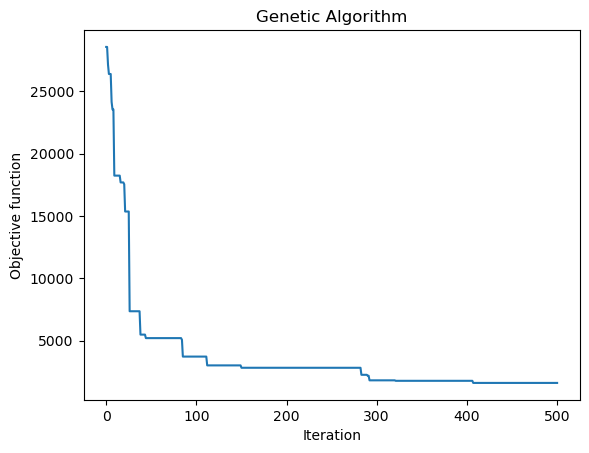

In [1126]:
# Here we set the search space for adjusting each centroid (we want small for non-major adjustments in small lat/long space) 
# A +/- range of 1.5 ensures the adjustments don't fall outside of the range by a large amount!
k = 6
varbound=np.array([[-1.5,1.5]]*(2*k))

# Define the algorithm parameters
### Here I tested different starter seeds. 
algorithm_params_test = {'max_num_iteration': 500, # The termination criterion of geneticalgorithm (Max # of populations)
                    'population_size':25, # determines the number of trial solutions in each iteration
                    'mutation_probability': 0.15, # Keep this the same
                    'elit_ratio': 0.02, # Same
                    'crossover_probability': 0.4, # Keep this the same
                    'parents_portion': 0.2, # Keep this the same
                    'crossover_type':'uniform', # there are three options including one_point; two_point, and uniform crossover functions
                    'max_iteration_without_improv':100} # if the algorithms does not improve the objective function over the number of successive iterations determined by this parameter, then geneticalgorithm stops and report the best found solution before the max_num_iterations to be met.

# Run the Model!
SP_model_test = ga(function=cluster_process_stdev_radialcompactness, dimension=2*k, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_params_test)
%matplotlib inline
SP_model_test.run() 

# The test case can be used to adjust the initial centroids for the algorithm moving forward. 

 
 
pop_size = 10, mutation_prob = 0.05, elit_ratio = 0.0, crossover_prob = 0.3, parents_portion = 0.1
 The best solution found:                                                                           
 [-0.10384696  0.53650619 -0.17859036 -0.77377237 -0.14677389  0.78257779
  0.27084323 -0.86294271  0.82771232 -0.00425011 -0.67961847 -0.01485411]

 Objective function:
 13390.691936414274


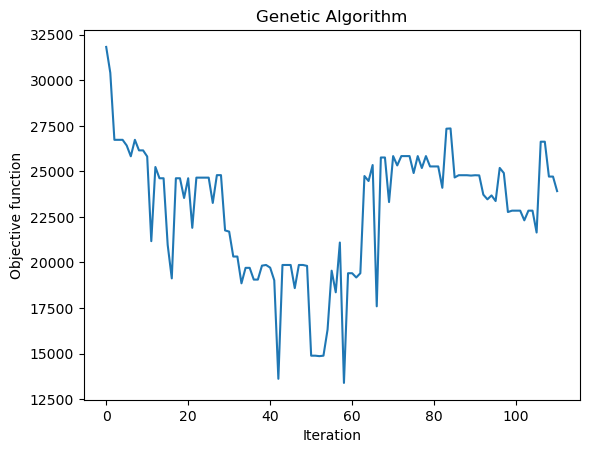


 
pop_size = 10, mutation_prob = 0.15, elit_ratio = 0.02, crossover_prob = 0.4, parents_portion = 0.2
 The best solution found:                                                                           
 [-0.4549922  -0.94065015 -0.67489863 -0.90138638 -0.81613226  1.12385706
  0.68032898 -0.95013815  0.40954864 -1.1439044   0.97032661  1.29110843]

 Objective function:
 4343.474764405593


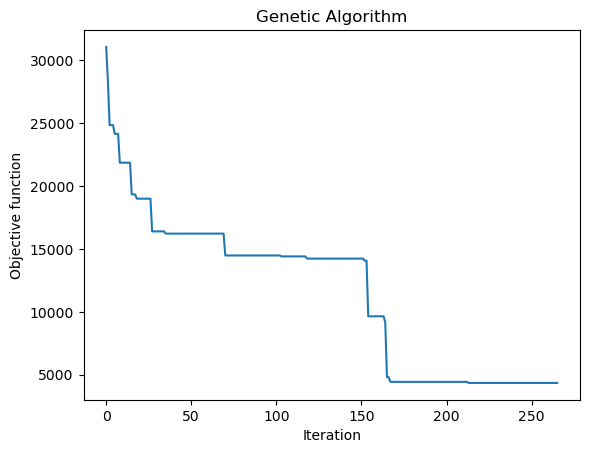


 
pop_size = 10, mutation_prob = 0.25, elit_ratio = 0.04, crossover_prob = 0.5, parents_portion = 0.3
 The best solution found:                                                                           
 [-0.61432401 -0.55217596 -0.66258739  0.04970386 -0.65232649 -0.3086814
  0.244498    0.48935197  1.34736592 -0.2014816   0.88309032  0.44999151]

 Objective function:
 10139.00175158974


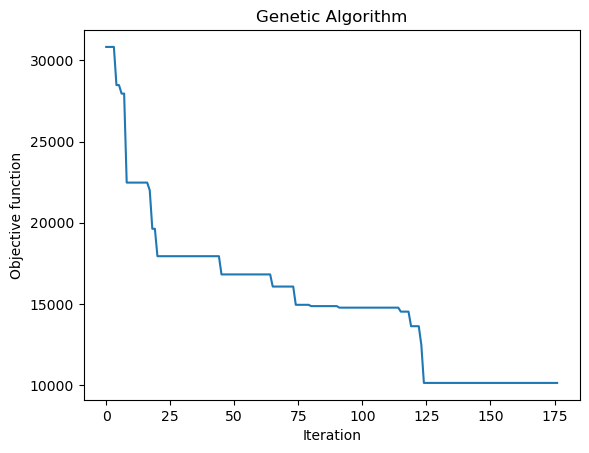


 
pop_size = 50, mutation_prob = 0.05, elit_ratio = 0.0, crossover_prob = 0.3, parents_portion = 0.1
 The best solution found:                                                                           
 [ 0.50780024  0.7850587   1.42392136 -0.2088054  -0.81429434  1.10738693
  1.04669655 -0.99044752 -1.16521227  0.21739056  0.90750233 -1.08371097]

 Objective function:
 21440.29414482646


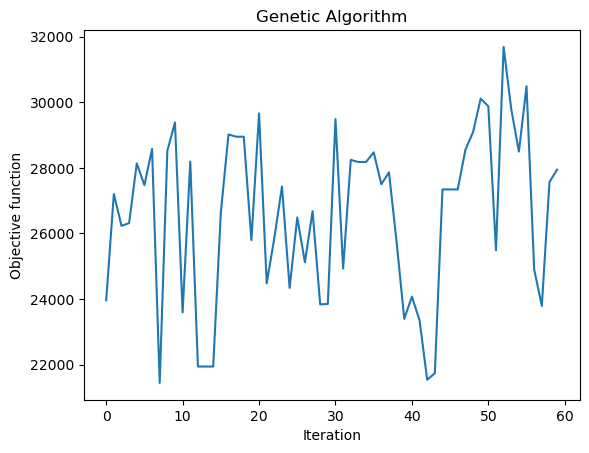


 
pop_size = 50, mutation_prob = 0.15, elit_ratio = 0.02, crossover_prob = 0.4, parents_portion = 0.2
 The best solution found:                                                                           
 [-0.14339677  0.23403023 -0.15688565 -0.29602738 -0.25614614  0.16830208
 -0.00295403 -0.72040211  0.39297964  0.46463178 -0.15710485  0.65641107]

 Objective function:
 4193.2122619109105


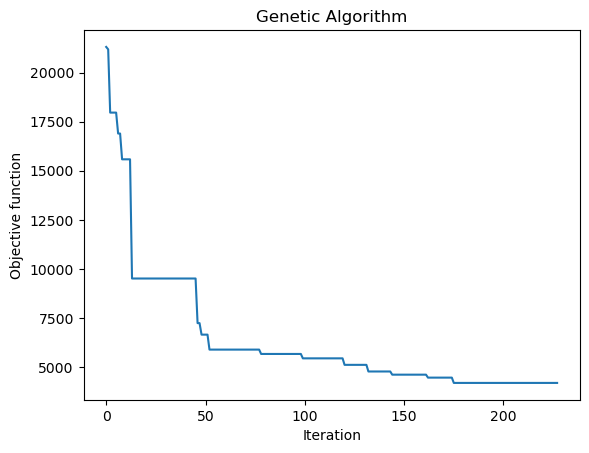


 
pop_size = 50, mutation_prob = 0.25, elit_ratio = 0.04, crossover_prob = 0.5, parents_portion = 0.3
 The best solution found:                                                                           
 [ 0.45746665  0.41816029 -0.08502361 -1.07493448  0.42817376  0.97379485
 -0.70464958 -0.6236157   0.4279707  -0.83832702  0.3123539  -0.54465194]

 Objective function:
 5466.068028192818


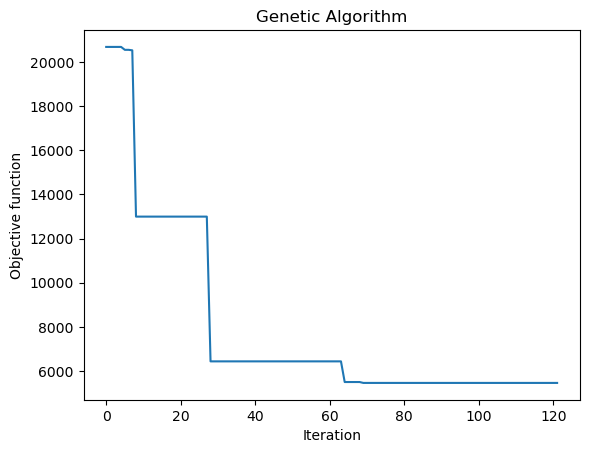


 
pop_size = 100, mutation_prob = 0.05, elit_ratio = 0.0, crossover_prob = 0.3, parents_portion = 0.1
 The best solution found:                                                                           
 [-1.27824632 -0.09673401  0.79102504 -0.40751957 -0.96415335  0.63854133
  0.18100185 -0.9135727  -1.07502226 -1.1622703   1.02607916  0.84030611]

 Objective function:
 13814.742235841328


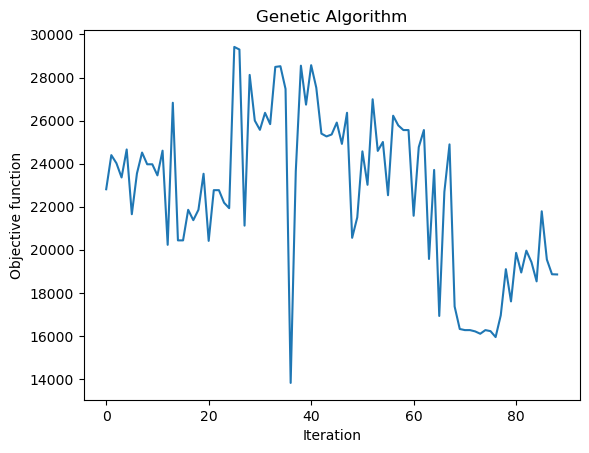


 
pop_size = 100, mutation_prob = 0.15, elit_ratio = 0.02, crossover_prob = 0.4, parents_portion = 0.2
 The best solution found:                                                                           
 [-0.21734169  0.34010507 -0.06444354  0.19998433 -0.44500182  0.2411293
 -0.02300336  0.32526012  0.40770958 -0.40517127  0.25582174 -0.03949357]

 Objective function:
 1588.4739722003583


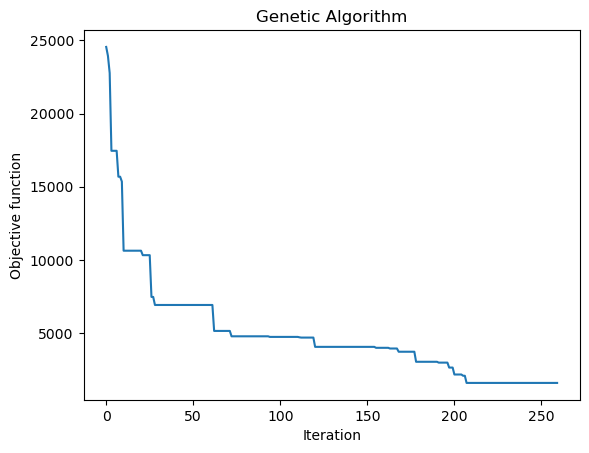


 
pop_size = 100, mutation_prob = 0.25, elit_ratio = 0.04, crossover_prob = 0.5, parents_portion = 0.3
 The best solution found:                                                                           
 [ 0.3013581   0.49454182  1.17290762 -0.48393162  0.15075156  0.9422857
 -0.87068078 -0.12164316 -0.28808388 -0.50526383 -0.2909106   0.97849955]

 Objective function:
 2638.7820178023344


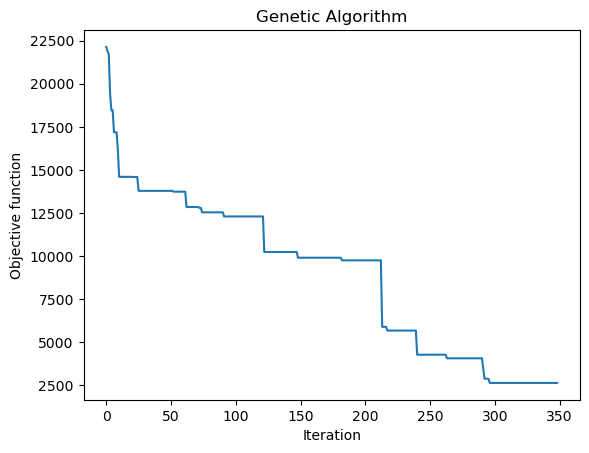

In [1128]:
#### Models 1-9 
# In population-based algorithms like GA, a set of points, called a population, is iteratively updated together to progress toward an optimal point
# We will test several variations to the algorithm below to minimize the function!

###### NOTE:
# Initial solutions from k-means can affect the result drastically. The objective of reaching a good enough
# solution means so long as the objectives are met the solution generated works. 
# Changing the initial solution could lead to better or worse results!
# The seed of 87 was best among 30+ tested initial seeds

# Here is a source used for getting the definitions of the parameters and tips for adjusting them:
# https://pypi.org/project/geneticalgorithm/
# I also used notes from DS775 Lesson 10/advice from Professor Jeff Baggett.

# SOME ADDITIONAL NOTES:
# We are after six centroids. This means we want a final solution individual with K*2 genes!
# the objective function we are attempting to minimize is the sum of the standard deviation and radial compactness
# Standard deviation addresses balance through getting tech_takehome as close to the average of 24999.17
# Radial Compactness adresses compactness by getting zones as ciscular as possible (minimal distance between centroid and assigned points)
# The next few sections are all focused heeavily on optimizing the solution space.

### FIRST RUN, DEFINE PARAMS & SET SEED 
# We create a for loop for testing different model parameters!
# We start by testing nine unique models!
k = 6


# Here we set the search space for adjusting each centroid (we want small for non-major adjustments in small lat/long space) 
# A +/- range of 1.5 ensures the adjustments don't fall outside of the range by a large amount!
varbound=np.array([[-1.5,1.5]]*(2*k))

# set the lists from which we will loop through to start searching for the optimal solution!
# The combinations focus on three sets of plausible starting points. 
# These include a small population, medium population, and large population
# Then, a small, medium, and high mutation probability goes from exploitation to exploration
# No elitism (0.0) means more exploration to higher elitism for exploitation
# Crossover can be geared towards either exploration or exploitation as the solution progresses. 
# Low parent portion promotes exploration by keeping few individuals to high promoting exploitation
# The key is we explore a spectrum from little to high for either exploration or exploitation to start
pop_sizes = [10, 50, 100]
mut_probs = [0.05, 0.15, 0.25]
elite_ratios = [0.00, 0.02, 0.04]
crossover_probs = [0.30, 0.40, 0.50]
parents_portion = [0.1, 0.2, 0.3]

# Define a list to store objective function values, centroid adjustment values, parameter values, and one to state the model #
objective_functions_1 = []
model_centroid_adjustments = []
model_parameters_1 = []
model_number = ["1","2","3","4","5","6","7","8","9"]

### SET THE SEED!
import random
np.random.seed(10)

for i in range (0,3):
    for j in range (0,3):
        
        # Define the algorithm parameters
        algorithm_params = {'max_num_iteration': 500, # The termination criterion of geneticalgorithm (Max runs)
                    'population_size':pop_sizes[i], # determines the number of trial solutions in each iteration
                    'mutation_probability': mut_probs[j], # determines the chance of each gene in each individual solution to be replaced by a random value
                    'elit_ratio': elite_ratios[j], #determines the number of elites in the population. 
                    'crossover_probability': crossover_probs[j], # determines the chance of an existed solution to pass its genome (aka characteristics) to new trial solutions (aka offspring)
                    'parents_portion': parents_portion[j], # the portion of population filled by the members of the previous generation (aka parents)
                    'crossover_type':'uniform', # there are three options including one_point; two_point, and uniform crossover functions
                    'max_iteration_without_improv':50} # if the algorithms does not improve the objective function over the number of successive iterations determined by this parameter, then geneticalgorithm stops and report the best found solution before the max_num_iterations to be met.

        # Append parameters to the model parameters list!
        new_space()
        new_space()
        model_parameters_1.append(f'pop_size = {pop_sizes[i]}, mutation_prob = {mut_probs[j]}, elit_ratio = {elite_ratios[j]}, crossover_prob = {crossover_probs[j]}, parents_portion = {parents_portion[j]}')
        print(f'pop_size = {pop_sizes[i]}, mutation_prob = {mut_probs[j]}, elit_ratio = {elite_ratios[j]}, crossover_prob = {crossover_probs[j]}, parents_portion = {parents_portion[j]}')

        # Run the Model!
        SP_model_current = ga(function=cluster_process_stdev_radialcompactness, dimension=2*k, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_params)
        %matplotlib inline
        SP_model_current.run()

        # Append the centroid adjustments to the list!
        model_centroid_adjustments.append(SP_model_current.output_dict['variable'])

        
        # Append the objective function to the list!
        objective_functions_1.append(SP_model_current.output_dict['function'])


# Note that the max_iters without improvement is low here. This is because I am simply looking for the optimal 
# solution space first. This will be increased in the next models. 

In [1130]:
### Get the min objective function of the first 9 models!

# Find the minimum element in objective function:
min_objectives_1 = min(objective_functions_1)

# Find the position of minimum objective function
mn_position = objective_functions_1.index(min_objectives_1)

# print the min objective function, model #, and parameters!
print(f'The best model from run #1 was: Model #{model_number[mn_position]}')
print(f'The objective function value was: {min_objectives_1:.12f}')
print(f'The optimal parameters were: {model_parameters_1[mn_position]}')

### The best model was at high population in the middle of the terms
### I will try to exploit this search space moving forward by making small adjustments to mutation,crossover,parent portion, and elitism
### Around these values. Notedly, a non-elitist random GA is performing very poorly, so elitism will Always be
### encorporated into the parameters from here on out. 
### Further, I will attempt to increase the population significantly to really try and
### exploit the best solution for the population!
### Lastly, the max iterations without improvement will be increased for attempting to ensure
### improvement cant still be made.

The best model from run #1 was: Model #8
The objective function value was: 1588.473972200358
The optimal parameters were: pop_size = 100, mutation_prob = 0.15, elit_ratio = 0.02, crossover_prob = 0.4, parents_portion = 0.2


 
 
pop_size = 200, mutation_prob = 0.15, elit_ratio = 0.02, crossover_prob = 0.4, parents_portion = 0.2
 The best solution found:                                                                           
 [-0.92243376  0.13446772 -0.31451672 -0.15624643  0.28231913  0.13333841
 -0.45561768  0.09216507  0.95159409  0.18876583  0.28164249 -0.1487292 ]

 Objective function:
 1255.950536798116


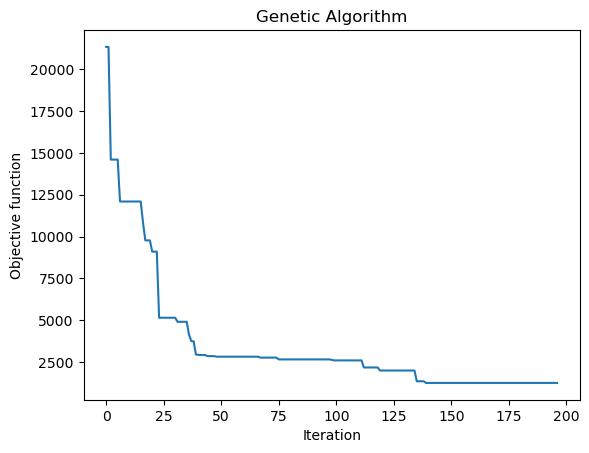


 
pop_size = 200, mutation_prob = 0.13, elit_ratio = 0.04, crossover_prob = 0.5, parents_portion = 0.3
 The best solution found:                                                                           
 [-0.24044012  0.87986289 -0.1289989  -0.63304697 -0.15263306  0.91224651
  0.45758344 -0.46954567 -0.04710457  0.16024733 -0.1325082   0.17912003]

 Objective function:
 2423.0712753693942


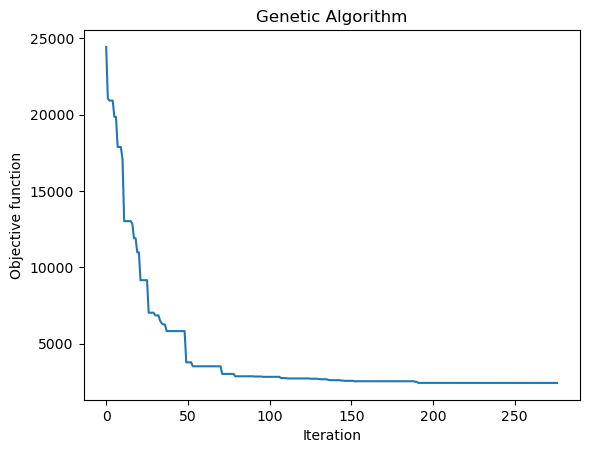


 
pop_size = 200, mutation_prob = 0.11, elit_ratio = 0.06, crossover_prob = 0.6, parents_portion = 0.4
 The best solution found:                                                                           
 [-1.34060857  0.76269046  1.11261839 -0.14732274  0.25233805  1.14239913
 -1.14192019 -0.11041186  0.0426583  -0.78712191  0.20959669 -0.86863468]

 Objective function:
 2204.2315164095808


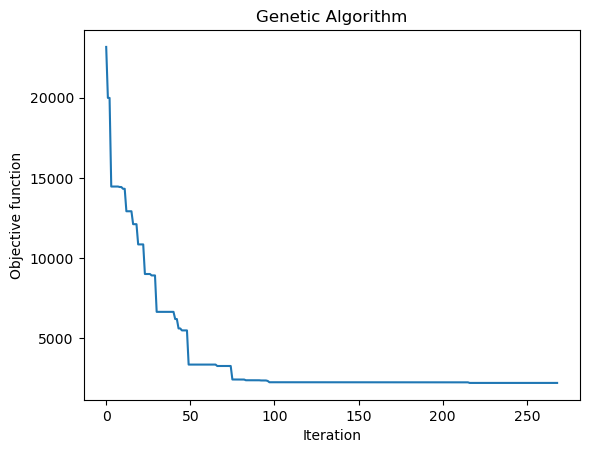


 
pop_size = 250, mutation_prob = 0.15, elit_ratio = 0.02, crossover_prob = 0.4, parents_portion = 0.2
 The best solution found:                                                                           
 [-0.82346344 -0.28446467  0.65701739 -0.11756123  0.48598652 -0.33375195
 -0.7423792  -0.30829589  0.28978342  0.71557892  0.7967791   0.62619008]

 Objective function:
 1389.7332619020444


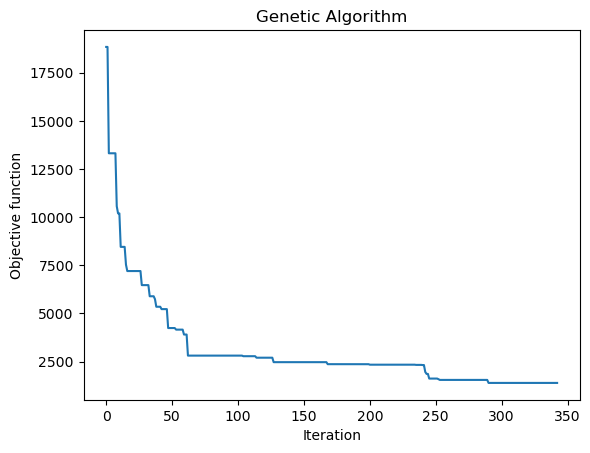


 
pop_size = 250, mutation_prob = 0.13, elit_ratio = 0.04, crossover_prob = 0.5, parents_portion = 0.3
 The best solution found:                                                                           
 [-0.30706881  0.06494615 -0.03917922 -0.51789683 -0.39144221  0.40630911
 -0.343586   -0.05803886  0.70438824  0.393361    0.30977486  0.36443053]

 Objective function:
 540.7039352024929


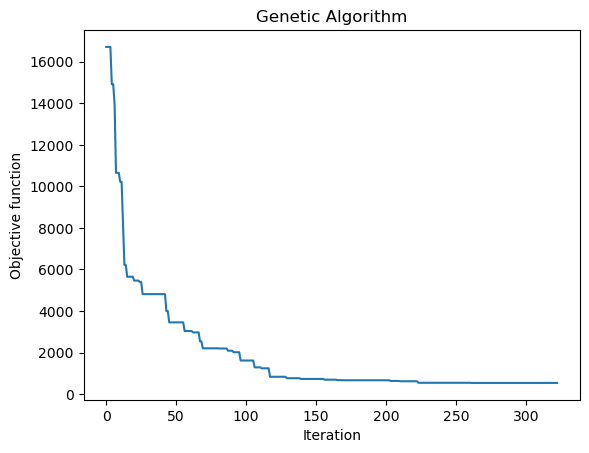


 
pop_size = 250, mutation_prob = 0.11, elit_ratio = 0.06, crossover_prob = 0.6, parents_portion = 0.4
 The best solution found:                                                                           
 [-0.13150887  0.82513458 -0.2842978   0.20734981 -0.30930123 -0.31814854
 -0.66164526 -0.01666138  0.69346872 -0.57040554  0.65030456  0.37745098]

 Objective function:
 1377.0557628345027


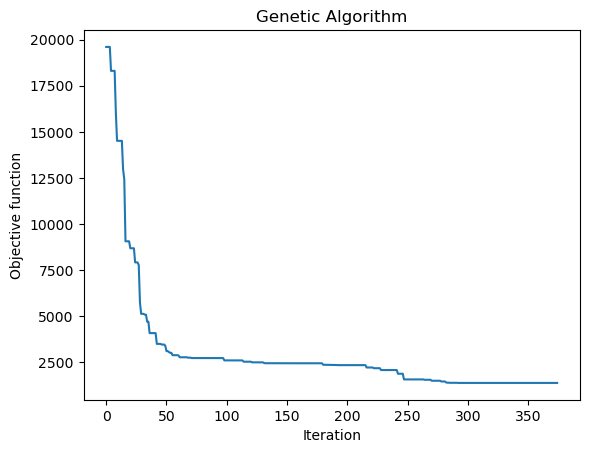

In [1132]:
### In runs 10 through 15 we target the population size and exploit the space of the best solution in model 8.
### An improvement of 20% or more in the OFFV value will warrant testing a final solution with the optimal parameters and a higher population
pop_sizes = [200, 250] #large jumps
mut_probs = [0.15, 0.13, 0.11] # All decreased by 0.02 of the best of 0.15 from M5. Lower mutation decreases randomness and increases exploitation
elite_ratios = [0.02, 0.04, 0.06] # NO NON-ELITIST GA's! ALL increased to keep fit members of this solution space
crossover_probs = [0.4, 0.5, 0.6] # Increase crossover probability
parents_portion = [0.2, 0.3, 0.4] # Increase parent portions similar to elitism

# Define a list to store objective function values, centroid adjustment values, parameter values, and one to state the model #
objective_functions_2 = []
model_centroid_adjustments_2 = []
model_parameters_2 = []
model_number = ["10","11","12","13","14","15"]

### SET THE SEED!
import random
np.random.seed(15)

k = 6

for i in range (0,2):
    for j in range (0,3):
        
        # Define the algorithm parameters
        algorithm_params = {'max_num_iteration': 500, # The termination criterion of geneticalgorithm (Max runs)
                    'population_size':pop_sizes[i], # determines the number of trial solutions in each iteration
                    'mutation_probability': mut_probs[j], # determines the chance of each gene in each individual solution to be replaced by a random value
                    'elit_ratio': elite_ratios[j], #determines the number of elites in the population. 
                    'crossover_probability': crossover_probs[j], # determines the chance of an existed solution to pass its genome (aka characteristics) to new trial solutions (aka offspring)
                    'parents_portion': parents_portion[j], # the portion of population filled by the members of the previous generation (aka parents)
                    'crossover_type':'uniform', # there are three options including one_point; two_point, and uniform crossover functions
                    'max_iteration_without_improv':50} # if the algorithms does not improve the objective function over the number of successive iterations determined by this parameter, then geneticalgorithm stops and report the best found solution before the max_num_iterations to be met.

        # Append parameters to the model parameters list!
        new_space()
        new_space()
        model_parameters_2.append(f'pop_size = {pop_sizes[i]}, mutation_prob = {mut_probs[j]}, elit_ratio = {elite_ratios[j]}, crossover_prob = {crossover_probs[j]}, parents_portion = {parents_portion[j]}')
        print(f'pop_size = {pop_sizes[i]}, mutation_prob = {mut_probs[j]}, elit_ratio = {elite_ratios[j]}, crossover_prob = {crossover_probs[j]}, parents_portion = {parents_portion[j]}')

        # Run the Model!
        SP_model_current = ga(function=cluster_process_stdev_radialcompactness, dimension=2*k, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_params)
        %matplotlib inline
        SP_model_current.run()

        # Append the centroid adjustments to the list!
        model_centroid_adjustments_2.append(SP_model_current.output_dict['variable'])

        
        # Append the objective function to the list!
        objective_functions_2.append(SP_model_current.output_dict['function'])


In [1251]:
### Get the min objective function from models 9-15 

# Find the minimum element in objective function:
min_objectives_2 = min(objective_functions_2)

# Find the position of minimum objective function
mn_position_2 = objective_functions_2.index(min_objectives_2)

# print the min objective function, model #, and parameters!
print(f'The best model from run #2 was: Model #{model_number[mn_position_2]}')
print(f'The objective function value was: {min_objectives_2:.11f}')
print(f'The optimal parameters were: {model_parameters_2[mn_position_2]}')
print(f'The Percent Improvement in OFFV was: {(min_objectives_2/min_objectives_1 * 100):0.2f}%')

### The model is optimized in a slightly different solution space from models 1-9. This means exploitation was successful.
### It also indicates an approach to at least a local optima, but most likely a near-global optima
### Finally, it tells us the tuning parameters are near optimal! 
### Improvement was greater than 20%, so another round of models will be ran. This time, the population
### will be held constant at 250.
### pop_size = 250, mutation_prob = 0.13, elit_ratio = 0.04, crossover_prob = 0.5, parents_portion = 0.3

The best model from run #2 was: Model #14
The objective function value was: 540.70393520249
The optimal parameters were: pop_size = 250, mutation_prob = 0.13, elit_ratio = 0.04, crossover_prob = 0.5, parents_portion = 0.3
The Percent Improvement in OFFV was: 34.04%


 
 
pop_size = 250, mutation_prob = 0.127, elit_ratio = 0.045, crossover_prob = 0.53, parents_portion = 0.33
 The best solution found:                                                                           
 [-0.20548399  0.43738159  0.46446438 -0.62977419 -0.26174806  0.28325791
 -0.20644768  0.16437307  0.31970419  0.13161403 -0.07041626  0.46921344]

 Objective function:
 1299.679728951694


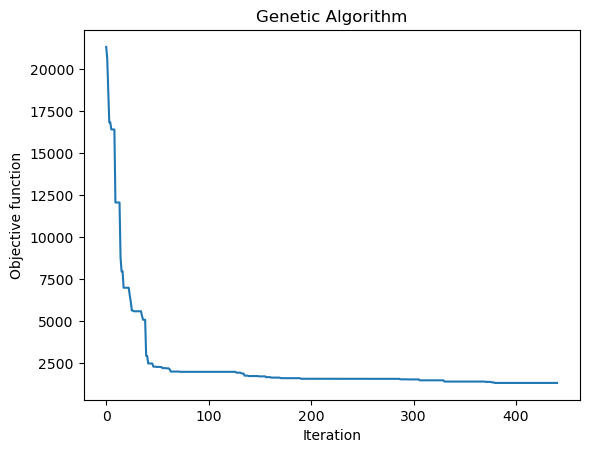


 
pop_size = 250, mutation_prob = 0.124, elit_ratio = 0.05, crossover_prob = 0.56, parents_portion = 0.36
 The best solution found:                                                                           
 [ 0.32084673  0.30713774  0.65754817  0.34182566 -0.32298846 -0.6204178
 -0.5127525   0.53780344 -0.25887015 -0.1903689   1.0880839   0.20810688]

 Objective function:
 2222.270653940208


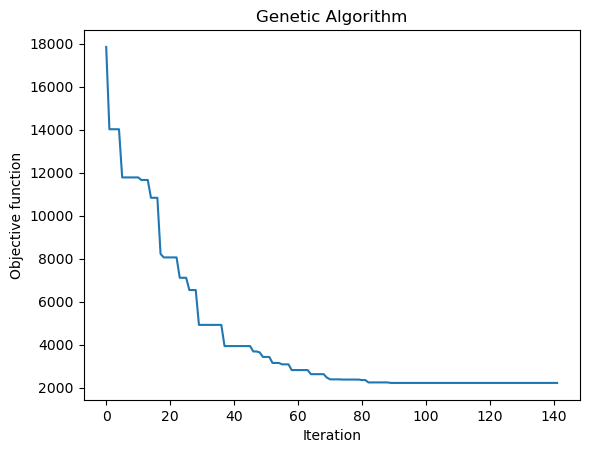


 
pop_size = 250, mutation_prob = 0.121, elit_ratio = 0.055, crossover_prob = 0.59, parents_portion = 0.39
 The best solution found:                                                                           
 [-0.13512042 -0.46363079 -0.46309751  0.22421324  0.31360374  0.82954793
 -0.86496359 -0.03042763  1.39136939 -0.11623379 -0.36001627 -0.11227945]

 Objective function:
 3482.6742843253014


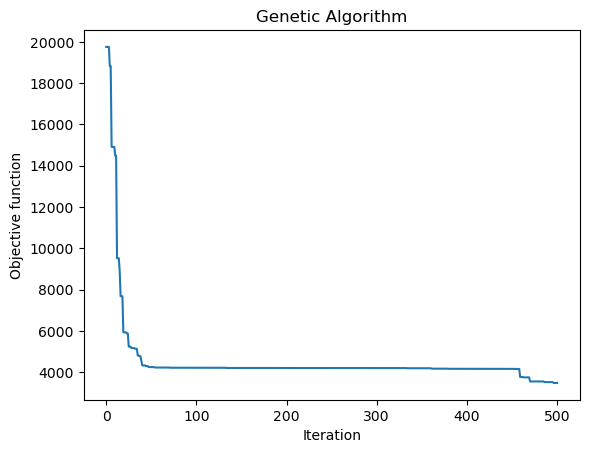

In [1253]:
### A third iteration with 3 new plausible parameter choices
### An improvement in OFFV will warrant another parameter grid of models
### NOTE: We are focusing on exploiting the optimal solution space even further, so adjustments are even more minor.

pop_sizes = [250] # Kept the same
mut_probs = [0.127, 0.124, 0.121] # Decreased by 0.003 from 0.13
elite_ratios = [0.045, 0.05, 0.055] # NO NON-ELITIST GA's! increased by 0.005
crossover_probs = [0.53, 0.56, 0.59] # Increase crossover by 0.03
parents_portion = [0.33, 0.36, 0.39] # Increase parent portions by 0.03

# Define a list to store objective function values, centroid adjustment values, parameter values, and one to state the model #
objective_functions_3 = []
model_centroid_adjustments_3 = []
model_parameters_3 = []
model_number = ["16", "17", "18"]

### SET THE SEED!
import random
np.random.seed(15)

k = 6

for i in range (0,1):
    for j in range (0,3):
        
        # Define the algorithm parameters
        algorithm_params = {'max_num_iteration': 500, # The termination criterion of geneticalgorithm (Max runs)
                    'population_size':pop_sizes[i], # determines the number of trial solutions in each iteration
                    'mutation_probability': mut_probs[j], # determines the chance of each gene in each individual solution to be replaced by a random value
                    'elit_ratio': elite_ratios[j], #determines the number of elites in the population. 
                    'crossover_probability': crossover_probs[j], # determines the chance of an existed solution to pass its genome (aka characteristics) to new trial solutions (aka offspring)
                    'parents_portion': parents_portion[j], # the portion of population filled by the members of the previous generation (aka parents)
                    'crossover_type':'uniform', # there are three options including one_point; two_point, and uniform crossover functions
                    'max_iteration_without_improv':50} # if the algorithms does not improve the objective function over the number of successive iterations determined by this parameter, then geneticalgorithm stops and report the best found solution before the max_num_iterations to be met.

        # Append parameters to the model parameters list!
        new_space()
        new_space()
        model_parameters_3.append(f'pop_size = {pop_sizes[i]}, mutation_prob = {mut_probs[j]}, elit_ratio = {elite_ratios[j]}, crossover_prob = {crossover_probs[j]}, parents_portion = {parents_portion[j]}')
        print(f'pop_size = {pop_sizes[i]}, mutation_prob = {mut_probs[j]}, elit_ratio = {elite_ratios[j]}, crossover_prob = {crossover_probs[j]}, parents_portion = {parents_portion[j]}')

        # Run the Model!
        SP_model_current = ga(function=cluster_process_stdev_radialcompactness, dimension=2*k, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_params)
        %matplotlib inline
        SP_model_current.run()

        # Append the centroid adjustments to the list!
        model_centroid_adjustments_3.append(SP_model_current.output_dict['variable'])

        
        # Append the objective function to the list!
        objective_functions_3.append(SP_model_current.output_dict['function'])


In [1261]:
### Get the min objective function from models 16-18

# Find the minimum element in objective function:
min_objectives_3 = min(objective_functions_3)

# Find the position of minimum objective function
mn_position_3 = objective_functions_3.index(min_objectives_3)

# print the min objective function, model #, and parameters!
print(f'The best model from run #3 was: Model #{model_number[mn_position_3]}')
print(f'The objective function value was: {min_objectives_3:.11f}')
print(f'The optimal parameters were: {model_parameters_3[mn_position_3]}')
### The solution got worse! So, it is a loss in OFFV. Presented as a negative here
print(f'The Percent WORSENING in OFFV was: -{(min_objectives_2/min_objectives_3 * 100):0.2f}%')



The best model from run #3 was: Model #16
The objective function value was: 1299.67972895169
The optimal parameters were: pop_size = 250, mutation_prob = 0.127, elit_ratio = 0.045, crossover_prob = 0.53, parents_portion = 0.33
The Percent WORSENING in OFFV was: -41.60%


In [1379]:
# Grab the optimal centroid solution for Model 14, the best model across all runs, to be used with the final function.
# [-0.30706881  0.06494615 -0.03917922 -0.51789683 -0.39144221  0.40630911
# -0.343586   -0.05803886  0.70438824  0.393361    0.30977486  0.36443053]
# FIND THIS IN MODEL OUTPUT IN RUNS 10-15!!!!

optimal_solution_centroid_adjustments = np.array([-0.30706881,  0.06494615, -0.03917922, -0.51789683, -0.39144221, 0.40630911, -0.343586, -0.05803886,  0.70438824,  0.393361, 0.30977486,  0.36443053])
# Print the centroids!
print("The initial centroids were:\n", SP_centroids_initial) 
new_space()
print("The Centroids of the optimal clusters are:\n",np.array(cluster_process_result(optimal_solution_centroid_adjustments)[1]))
optimal_centroid_placements_plotting = np.array(cluster_process_result(optimal_solution_centroid_adjustments)[1])

### Labels to add for the graphic
optimized_labels = np.array([[0],[1],[2],[3],[4],[5]])

### append the labels to the centroid locationd
labeled_centroids_optimized = np.append(optimized_labels,optimal_centroid_placements_plotting, axis = 1)

### Get the service counts in each cluster:
optimized_services_list = [sum(SP_customers_clean[SP_customers_clean['Optimized_Cluster_IDs'] == i]['Yearly_Service_Total']) for i in range(k)]
optimized_rounded_services_list = [round(elem, 2) for elem in optimized_services_list]

### Get the Radial Symmetry for the best clusters as a list!
optimized_radial_symmetry_array = np.array(cluster_process_result(optimal_solution_centroid_adjustments)[3])
optimized_radial_symmetry_list = optimized_radial_symmetry_array.tolist()
rounded_optimized_radial_symmetry_list = [round(elem, 2) for elem in optimized_radial_symmetry_list]

The initial centroids were:
 [[-89.14683637  44.3550996 ]
 [-89.69800154  44.95145667]
 [-89.53661155  44.49996829]
 [-89.57819625  44.91333217]
 [-90.15004695  44.68456373]
 [-89.80524214  44.25784255]]
 
The Centroids of the optimal clusters are:
 [[-89.45390518  44.42004575]
 [-89.73718076  44.43355984]
 [-89.92805376  44.9062774 ]
 [-89.92178225  44.85529331]
 [-89.44565871  45.07792473]
 [-89.49546728  44.62227308]]


In [1345]:
#### HERE WE WORK WITH the best model and build the function for getting the 
#### cluster assignments, centroid placements, and technician takehomes for each zone!

# Here we create the same function fed to the genetic algorithm so that we can extract the results from our
# Best model!
def cluster_process_result(cntds): # Same function as above without the fitness value
    # This function essentially just assigns the optimal output to get the best solution based on the GA optimized centroids!
    # To start, Change the array output of the optimized centroid locations into a list of K optimal clusters 
    cntds_list = [] 
    for i in range(k):
        cntds_list.append([cntds[2*i],cntds[2*i+1]]) # Append the i and i + 1 elements together to form a centroid
    cntds_list

    # Now add the initial centroids and optimized centroid moves element wise to create the new optimal centroid location array
    cntds_list_optimal = np.add(np.array(cntds_list),np.array(SP_centroids_initial))

    # Set the cluster assignment list
    cluster_ids = []

    ### THIS IS THE DISTANCE CALCULATION MATRIX FOR POINT ASSIGNMENT! 
    for i in range(len(SP_points)): # Loop through each latitude and longitude pair, 1 per customer
        temp_id = 0 # ID FOR CLUSTER ASSIGNMENT
        ### Starter Manhattan Distance Value from cluster #1, so on..!
        ### What is the distance from the points to the optimized centroids?
        dist_val = abs(cntds_list_optimal[0][0]-SP_points[i][0]) + abs(cntds_list_optimal[0][1]-SP_points[i][1])
        # Now loop through the centroid list to calculate distance function at each step. Then assign based on shortest distance!
        for j in range(len(cntds_list)):
            # What is the distance from cluster 1,2,3....K
            tem_dist = abs(cntds_list_optimal[j][0]-SP_points[i][0]) + abs(cntds_list_optimal[j][1]-SP_points[i][1]) 
            if tem_dist < dist_val: # If the distance is shorter than the distance from cluster #1 (First time through then can change) calculated first in dist_val
                # Reassign the cluster and distance then move to the next calculation and comparison
                temp_id = j
                dist_val = tem_dist
        cluster_ids.append(temp_id) # When loop finishes, the point is assigned to the cluster with the shortest distance!

    # Add the optimal cluster ids to the capacity data
    SP_Constraints['cluster_labels_GA'] = cluster_ids # Labels of each point

    # Get an array of takehome for each optimized cluster, 
    takehome_counter = np.array([sum(SP_Constraints[SP_Constraints['cluster_labels_GA'] == i]['Tech_Takehome']) for i in range(k)]) # Counter function

    # Get an array of radial compactness to return.

    # Here we define the radial compactness for the chromosome center adjustments!

    # add the cluster ids to the coords dataset
    SP_Coords['cluster_labels_GA'] = cluster_ids # Labels of each point

    radial_compactness = np.empty(6) # Set empty array for six values (radial compactness for each of K clusters)

    ## Define the best centroids (in this case it is just the current centroid being considered for a chromosome)
    best_centroids = cntds_list_optimal

    for i in range(k): # For each of six centroids
        radial_compactness_total_clusteri = 0
        SP_points_clusteri = SP_Coords[SP_Coords['cluster_labels_GA'] == i] # Get the coords for only the ith cluster!
        # Now we must convert the dataset to an array!
        SP_clusteri_array = [list(a) for a in zip(SP_points_clusteri['Longitude'], SP_points_clusteri['Latitude'])]
        SP_clusteri_array  = np.array(SP_clusteri_array) # THIS IS THE ARRAY OF COORDINATE POINTS BELONGING TO CLUSTER i
        if i == 0: # For the first cluster center we create the cluster center array
            current_cluster_center = list([[best_centroids[i][0], best_centroids[i][1]]]) # Extract the lat/long for the current cluster as a list to make a 1 by 2 array!
            cluster_centers = np.array(current_cluster_center) # Make the 1 by 2 array to match shape with best centroids and coords arrays
            for j in range(len(SP_clusteri_array)): # for each point assigned to the current centroid
                radial_j = math.sqrt((cluster_centers[i][0]-SP_clusteri_array[j][0])**2 + (cluster_centers[i][1]-SP_clusteri_array[j][1])**2) # radial compactness value for point j
                radial_compactness_total_clusteri += radial_j # Add to radial compactness the value for point j
            radial_compactness[i] = radial_compactness_total_clusteri # once totaled add it to the final array!
        else: # In all other cases we append to the cluster centers array!
            current_cluster_center = list([[best_centroids[i][0], best_centroids[i][1]]]) # Get the ith cluster centroid
            cluster_centers = np.r_[cluster_centers,current_cluster_center] # Append it to the list
            for j in range(len(SP_clusteri_array)): # for each point assigned to the current centroid
                radial_j = math.sqrt((cluster_centers[i][0]-SP_clusteri_array[j][0])**2 + (cluster_centers[i][1]-SP_clusteri_array[j][1])**2) # radial compactness value for point j
                radial_compactness_total_clusteri += radial_j # Add to radial compactness the value for point j
            radial_compactness[i] = radial_compactness_total_clusteri # once totaled add it to the final array
   
    
    # Return the optimized values based on the optimal centroid locations!
    return cluster_ids,cntds_list_optimal,takehome_counter, radial_compactness

# Get the tech takehome of each cluster for the best model found
print("Optimized income for each cluster:",np.array(cluster_process_result(optimal_solution_centroid_adjustments)[2]))
# Optimized count in each cluster: [25074.08 25073.35 24943.06 24945.55 25068.91 24890.08]
print("The standard deviation across clusters is:",np.std(np.array(cluster_process_result(optimal_solution_centroid_adjustments)[2])))
new_space()
# Get the Radial Symmetry for the best model!
print("Optimized radial symmetry for each cluster:",np.array(cluster_process_result(optimal_solution_centroid_adjustments)[3]))
print("The summed radial symmetry penalty term is:",np.sum(np.array(cluster_process_result(optimal_solution_centroid_adjustments)[3])))
new_space()
# Get the Yearly Service Totals for the best model!
optimized_services_list = [sum(SP_customers_clean[SP_customers_clean['Optimized_Cluster_IDs'] == i]['Yearly_Service_Total']) for i in range(k)]
optimized_rounded_services_list = [round(elem, 2) for elem in optimized_services_list]
print("Optimized yearly services for each cluster:", optimized_rounded_services_list)
new_space()
# Get the Centroids for the best model!
print("The Centroids of the clusters are:",np.array(cluster_process_result(optimal_solution_centroid_adjustments)[1]))
optimal_centroid_placements = np.array(cluster_process_result(optimal_solution_centroid_adjustments)[1])
new_space()
# Get the cluster ID's for the best model!
cluster_ids_optimal = np.array(cluster_process_result(optimal_solution_centroid_adjustments)[0])
#print(cluster_ids_optimal) Uncomment if wanting to see, otherwise just add to the final dataset
#new_space()

SP_customers_clean["Optimized_Cluster_IDs"] = cluster_ids_optimal

# Get the optimized counts for tech takehome from the best solution and the centroid adjustments that got us there
# Also output the objective function value!
print(f'The objective function value for this solution is: 540.70')

### Make a table for the Zones with their centroid locations!\
# Import the tabulate library for table output creation
from tabulate import tabulate


### Create lists for each zone!
Zone_Centroids = [
    ["Zone 1", -89.454, 44.420, 24912.98, 1548, 67.15],
    ["Zone 2", -89.737, 44.434, 24967.76, 1518, 76.41],
    ["Zone 3", -89.928, 44.906, 25050.91, 1495, 91.68],
    ["Zone 4", -89.922, 44.855, 25024.42, 1574, 108.50],
    ["Zone 5", -89.446, 45.078, 25060.33, 1525, 91.78],
    ["Zone 6", -89.495, 44.622, 24978.63, 1554, 53.72]
]

headers_Zone_Centroids = ["Zone Number", "Longitude", "Latitude", "Technician Income", "Yearly Services", "Radial Symmetry"]

# Display with 'fancy_grid' format
table_fancy_ZoneSummaries = tabulate(Zone_Centroids, headers=headers_Zone_Centroids, tablefmt="fancy_grid")
with open('table_ZoneCentroidSummaries.txt', 'w') as f:
    f.write(tabulate(Zone_Centroids, headers=headers_Zone_Centroids, tablefmt="fancy_grid"))

Optimized income for each cluster: [24912.98 24967.76 25050.91 25024.42 25060.33 24978.63]
The standard deviation across clusters is: 51.4657353380854
 
Optimized radial symmetry for each cluster: [ 67.15039693  76.41261555  91.6757672  108.49889615  91.78429303
  53.71623249]
The summed radial symmetry penalty term is: 489.23820135407175
 
Optimized yearly services for each cluster: [1548, 1518, 1495, 1574, 1525, 1554]
 
The Centroids of the clusters are: [[-89.45390518  44.42004575]
 [-89.73718076  44.43355984]
 [-89.92805376  44.9062774 ]
 [-89.92178225  44.85529331]
 [-89.44565871  45.07792473]
 [-89.49546728  44.62227308]]
 
The objective function value for this solution is: 540.70


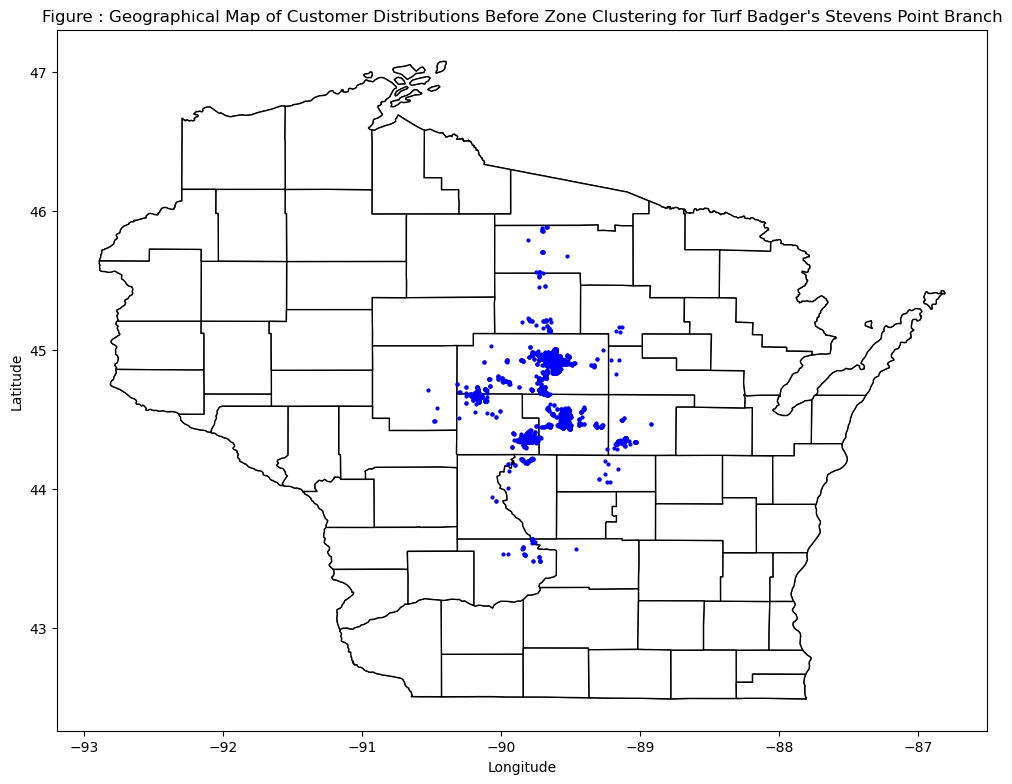

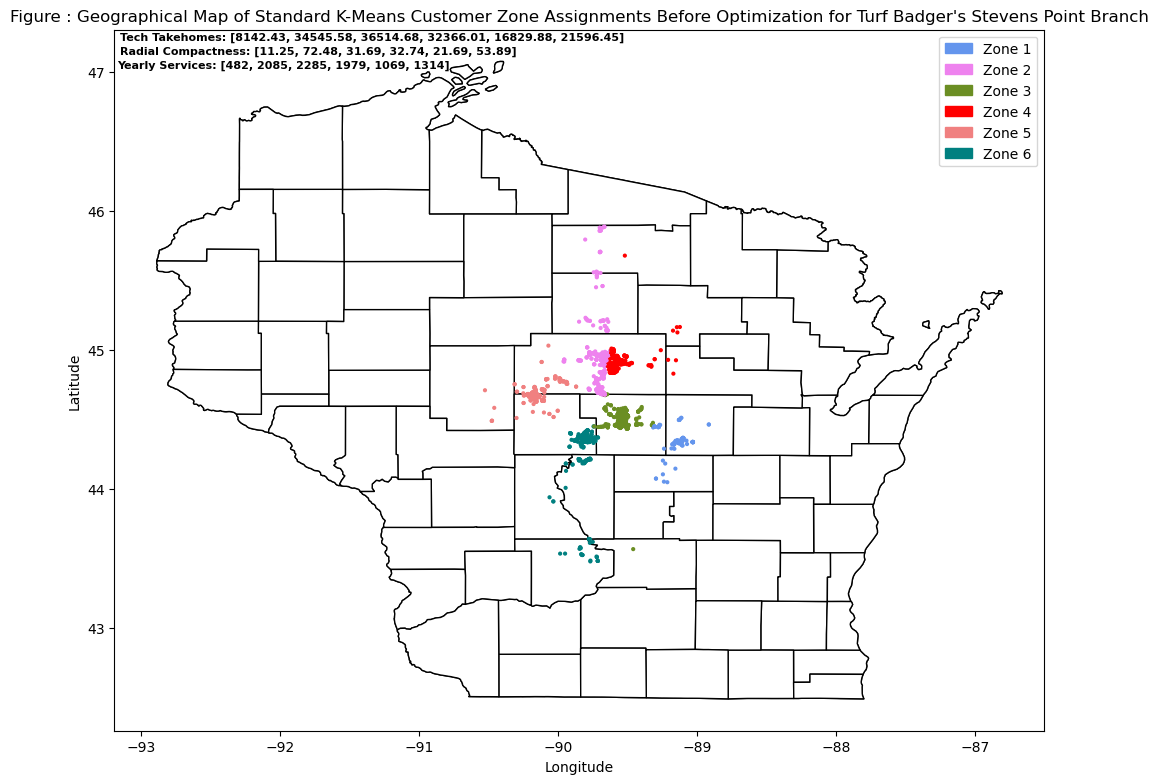

In [1172]:

### Now, we create An initial visualization of the points prior to assignment!
### For this we will use geopandas to map on Wisconsin!
### The wisconsin map code was constructed from an example found here:
### https://datascience.quantecon.org/tools/maps.html by university of wisconsin professor Kim Ruhl and
### UBC professor Philip Solimine

## Load the dataset for the state map
state_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip")
# state_df.head(1)

## Load the dataset for the county map
county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")
# county_df.head(1)

## We filter the dataset for Wisconsin counties only (STATEFP == 55 as noted by the resource linked above)
county_df = county_df.query("STATEFP == '55'")

# Check the max and min lat/long just to make sure they make sense!
# print(SP_Coords['Latitude'].max())
# print(SP_Coords['Latitude'].min())
# print(SP_Coords['Longitude'].max())
# print(SP_Coords['Longitude'].min())

## 43 to 45 lat and -88 to -90 long fit the map!

## We now convert the lat/longitude into geopandas coordinates for the map!
SP_Coords_GEO = gpd.GeoDataFrame(SP_Coords, geometry = gpd.points_from_xy(SP_Coords.Longitude, SP_Coords.Latitude))
SP_Coords_GEO = SP_Coords_GEO['geometry']
# print(SP_Coords_GEO.head(3))

## Now, lets plot the base map with the customer points!!

%matplotlib inline
# rcParams['font.weight'] = 'bold' To bold axes markers
fig, gax = plt.subplots(figsize=(12, 12))
state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")
SP_Coords_GEO.plot(ax = gax, markersize = 4, color = 'blue',marker = 'o')
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title("Figure : Geographical Map of Customer Distributions Before Zone Clustering for Turf Badger's Stevens Point Branch")
fig.savefig('CustomersMap.png')

## We also plot the initial kmeans to compare against the optimal here!

SP_Coords_GEO["Initial_KMeans_IDs"] = SP_labels_initial

# Import mpatches for custom legend
import matplotlib.patches as mpatches

colormap = np.array(["cornflowerblue", "violet", "olivedrab","red", "lightcoral", "teal"])
optimal_ids_kmeans = np.array(SP_Coords_GEO["Initial_KMeans_IDs"])


### Now Graph!
%matplotlib inline
# rcParams['font.weight'] = 'bold' To bold axes markers
fig_kmeans, gax_kmeans = plt.subplots(figsize=(12, 12))
state_df.query("NAME == 'Wisconsin'").plot(ax=gax_kmeans, edgecolor="black", color="white")
county_df.plot(ax=gax_kmeans, edgecolor="black", color="white")
Optimized_SP_Coords_GEO["geometry"].plot(ax = gax_kmeans, markersize = 4, c=colormap[optimal_ids_kmeans],marker = 'o')
gax_kmeans.set_xlabel('Longitude')
gax_kmeans.set_ylabel('Latitude')
gax_kmeans.set_title("Figure : Geographical Map of Standard K-Means Customer Zone Assignments Before Optimization for Turf Badger's Stevens Point Branch")
gax_kmeans.annotate("Tech Takehomes: " + str(rounded_takehome_list), xy = (-93.15, 47.23), weight = "bold", fontsize= 8)
gax_kmeans.annotate("Yearly Services: " + str(rounded_services_list), xy = (-93.17, 47.03), weight = "bold", fontsize= 8)
gax_kmeans.annotate("Radial Compactness: " + str(rounded_radial_compactness_list), xy = (-93.15, 47.13), weight = "bold", fontsize= 8)
clust1 = mpatches.Patch(color="cornflowerblue", label='Zone 1')
clust2 = mpatches.Patch(color="violet", label='Zone 2')
clust3 = mpatches.Patch(color="olivedrab", label='Zone 3')
clust4 = mpatches.Patch(color="red", label='Zone 4')
clust5 = mpatches.Patch(color="lightcoral", label='Zone 5')
clust6 = mpatches.Patch(color="teal", label='Zone 6')
gax_kmeans.legend(handles=[clust1,clust2,clust3,clust4,clust5,clust6])
fig_kmeans.savefig('KMeansMap_Wisconsin.png')

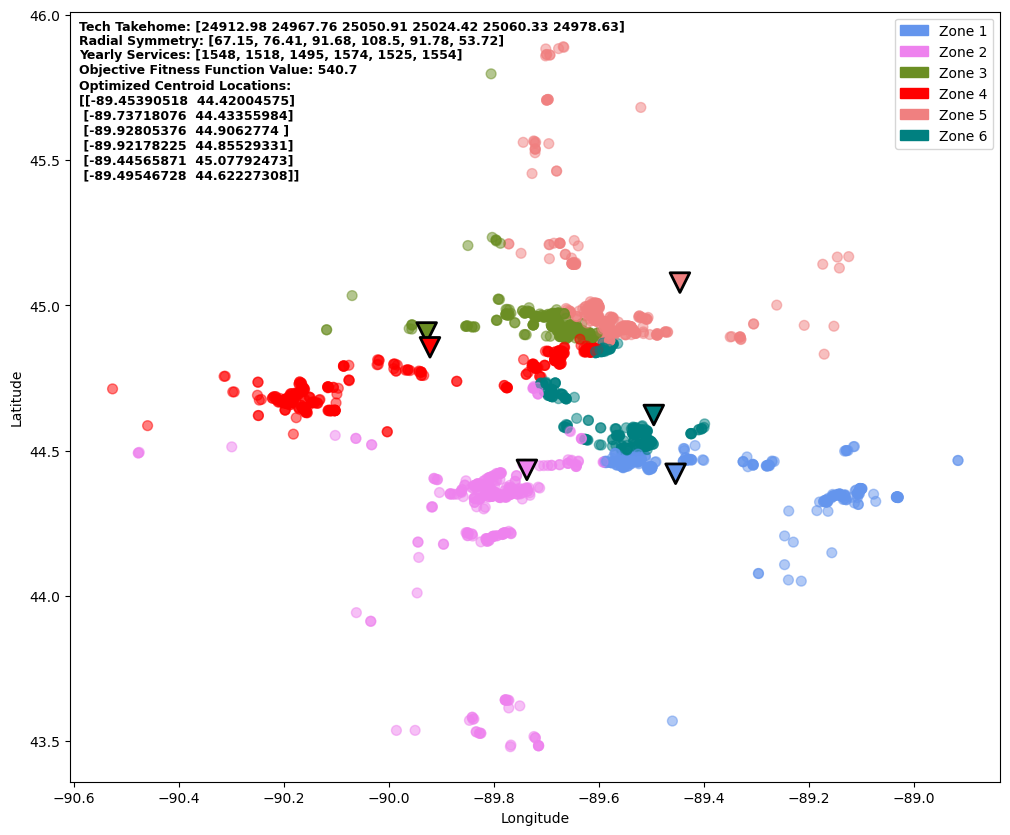

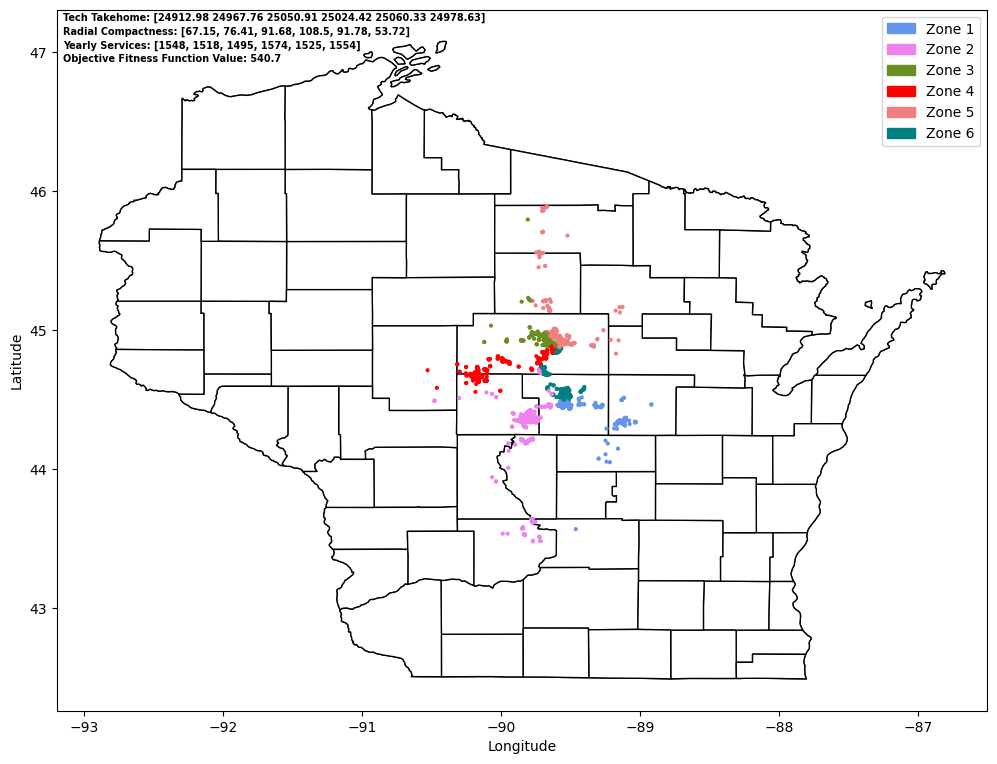

In [1417]:
### Here we plot the optimized clusters on the map with color coding.
### We also plot the clusters off the map. 

### Here we focus on plotting the results without the map

from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Get the service counts in each cluster:
optimized_services_list = [sum(SP_customers_clean[SP_customers_clean['Optimized_Cluster_IDs'] == i]['Yearly_Service_Total']) for i in range(k)]
optimized_rounded_services_list = [round(elem, 2) for elem in optimized_services_list]

### Get the Radial Symmetry for the best clusters as a list!
optimized_radial_symmetry_array = np.array(cluster_process_result(optimal_solution_centroid_adjustments)[3])
optimized_radial_symmetry_list = optimized_radial_symmetry_array.tolist()
rounded_optimized_radial_symmetry_list = [round(elem, 2) for elem in optimized_radial_symmetry_list]

## We now convert the lat/longitude into geopandas coordinates for the map!
Optimized_SP_Coords_GEO = gpd.GeoDataFrame(SP_Coords, geometry = gpd.points_from_xy(SP_Coords.Longitude, SP_Coords.Latitude))
Optimized_SP_Coords_GEO["Optimized_Cluster_IDs"] = SP_customers_clean["Optimized_Cluster_IDs"]

##### A FIRST FIGURE JUST LOOKING AT THE CLUSTERS NOT ON A MAP WITH DENSITY VIA ALPHA!
# map predictions to label

# Import mpatches for custom legendeucl
import matplotlib.patches as mpatches

colormap = np.array(["cornflowerblue", "violet", "olivedrab","red", "lightcoral", "teal"])
optimal_ids = np.array(Optimized_SP_Coords_GEO["Optimized_Cluster_IDs"])
optimal_id_values = np.array([0,1,2,3,4,5])

plt.figure(figsize=(12, 10))
plt.scatter(Optimized_SP_Coords_GEO["Longitude"], Optimized_SP_Coords_GEO["Latitude"], c=colormap[optimal_ids], s=50, alpha = 0.5)
plt.scatter(labeled_centroids_optimized[:,1], labeled_centroids_optimized[:,2],c=colormap[optimal_id_values],edgecolors = 'black',linewidth=2,marker="v",s=200)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.annotate("Tech Takehome: " + str(np.array(cluster_process_result(optimal_solution_centroid_adjustments)[2])), xy = (-90.59, 45.95), weight = "bold", fontsize= 9)
plt.annotate("Radial Symmetry: " + str(rounded_optimized_radial_symmetry_list), xy = (-90.59, 45.90), weight = "bold", fontsize= 9)
plt.annotate("Yearly Services: " + str(optimized_services_list), xy = (-90.59, 45.85), weight = "bold", fontsize= 9)
plt.annotate("Objective Fitness Function Value: " + str(540.70), xy = (-90.59, 45.8), weight = "bold", fontsize = 9)
plt.annotate("Optimized Centroid Locations: \n" + str(optimal_centroid_placements_plotting), xy = (-90.59, 45.435), weight = "bold", fontsize= 9)
clust1 = mpatches.Patch(color="cornflowerblue", label='Zone 1')
clust2 = mpatches.Patch(color="violet", label='Zone 2')
clust3 = mpatches.Patch(color="olivedrab", label='Zone 3')
clust4 = mpatches.Patch(color="red", label='Zone 4')
clust5 = mpatches.Patch(color="lightcoral", label='Zone 5')
clust6 = mpatches.Patch(color="teal", label='Zone 6')
plt.legend(handles=[clust1,clust2,clust3,clust4,clust5,clust6])
plt.savefig('ZonesOptimized_.png')


#### Now, we plot the zones on the map by color!

## Now, lets plot the base map with the customer points!!

%matplotlib inline
# rcParams['font.weight'] = 'bold' To bold axes markers
fig_1, gax_1 = plt.subplots(figsize=(12, 12))
state_df.query("NAME == 'Wisconsin'").plot(ax=gax_1, edgecolor="black", color="white")
county_df.plot(ax=gax_1, edgecolor="black", color="white")
Optimized_SP_Coords_GEO["geometry"].plot(ax = gax_1, markersize = 4, c=colormap[optimal_ids],marker = 'o')
gax_1.set_xlabel('Longitude')
gax_1.set_ylabel('Latitude')
gax_1.annotate("Tech Takehome: " + str(np.array(cluster_process_result(optimal_solution_centroid_adjustments)[2])), xy = (-93.15, 47.23), weight = "bold", fontsize= 7)
gax_1.annotate("Radial Compactness: " + str(rounded_optimized_radial_symmetry_list), xy = (-93.15, 47.13), weight = "bold", fontsize= 7)
gax_1.annotate("Yearly Services: " + str(optimized_services_list), xy = (-93.15, 47.03), weight = "bold", fontsize= 7)
gax_1.annotate("Objective Fitness Function Value: " + str(540.70), xy = (-93.15, 46.93), weight = "bold", fontsize = 7)
gax_1.legend(handles=[clust1,clust2,clust3,clust4,clust5,clust6])
fig_1.savefig('ZonesMapped_Wisconsin.png')


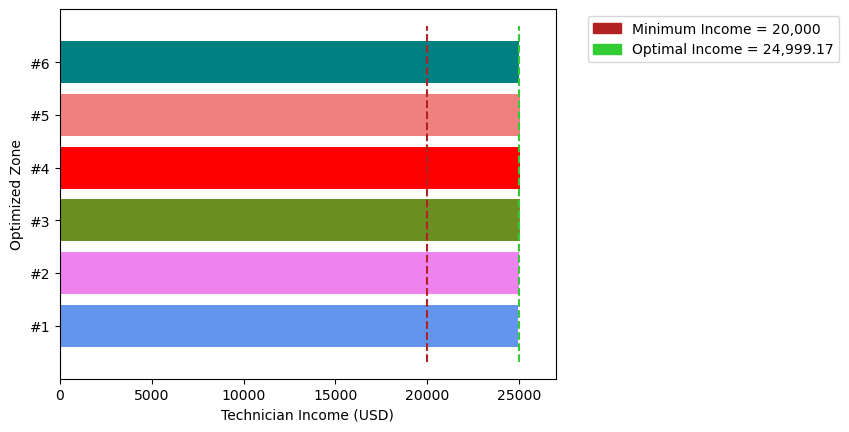

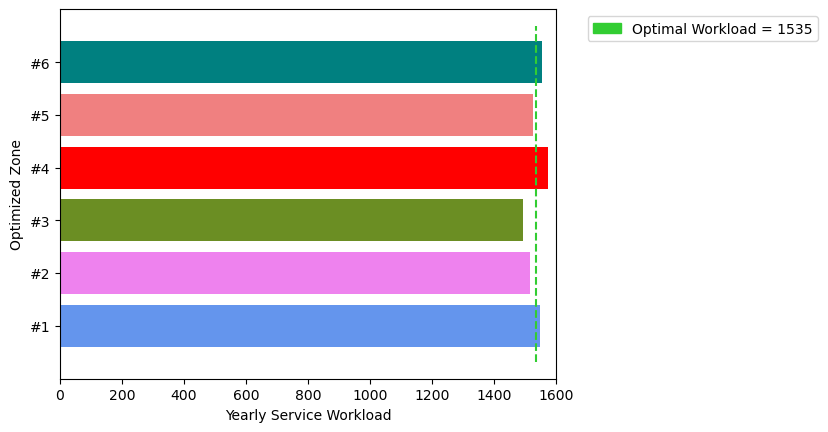

                        01   02   03   04   05   06   07   08   09   10   11  \
Optimized_Cluster_IDs                                                          
0                      102   87  118   77  191  172  150  159  197   82   96   
1                      106  110   84   97  161  190  155  152  167  125   81   
2                      117   70   95  111  159  156  205  147  161  104   96   
3                      115   62  124   93  160  200  188  137  222   95   72   
4                      107  102  107  106  157  148  195  149  140  111  125   
5                      128  104   86   96  192  157  169  162  171  109  107   

                        12  
Optimized_Cluster_IDs       
0                      117  
1                       90  
2                       74  
3                      106  
4                       78  
5                       73  


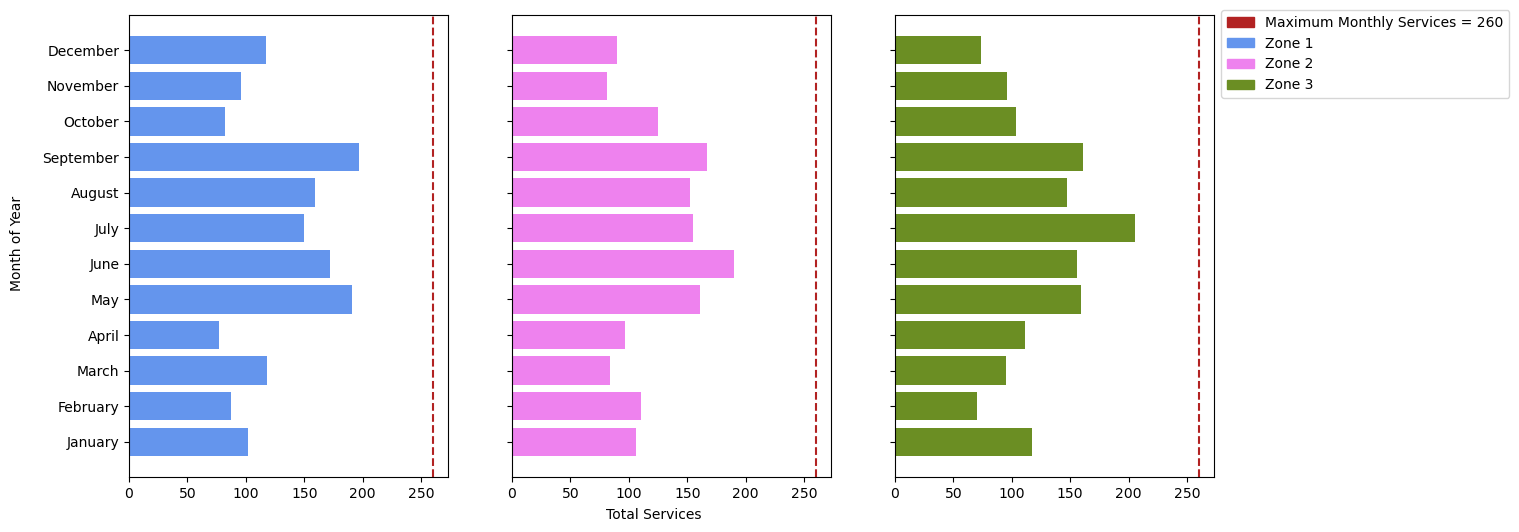

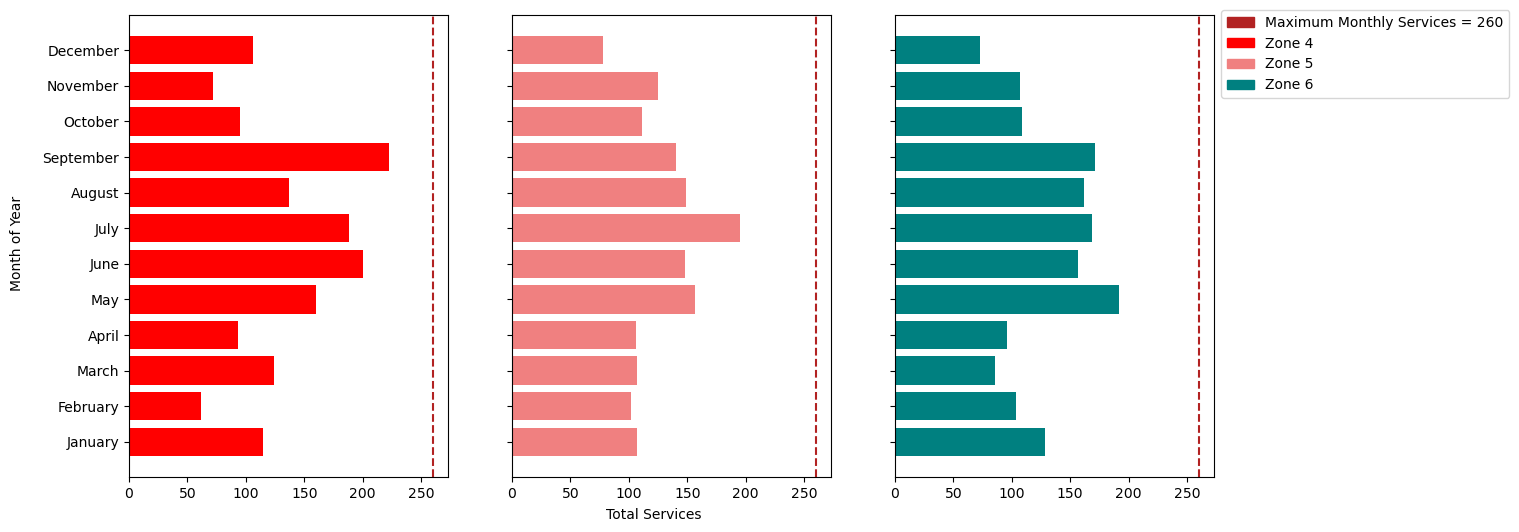

In [1421]:
#### Here we produce another visualization for the Tech Takehome 
#### It will be a barplot of the zones!
#### This essentially backs up the "good nough" solution!

zones = ['#1', '#2', '#3', '#4', '#5', '#6']
takehome = [24912.98, 24967.76, 25050.91, 25024.42, 25060.33, 24978.63]
ref_lines = np.array(["firebrick","limegreen"])

plt.barh(zones, takehome, color = colormap)
plt.xlabel('Technician Income (USD)')
plt.ylabel('Optimized Zone')
reference = [20000,24999.17]
plt.xlim(0,27000)
left, right = plt.ylim()
plt.vlines(reference, ymin=left, ymax=right, color=ref_lines, linestyles='--')
constraint_min = mpatches.Patch(color="firebrick", label='Minimum Income = 20,000')
objective_optimal = mpatches.Patch(color="limegreen", label='Optimal Income = 24,999.17')
plt.legend(handles=[constraint_min, objective_optimal],bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('IncomeConstraintMet.png', bbox_inches='tight')
plt.show()

#### Now we produce a visual for workload!
#### It will be a barplot of the zones!
#### This essentially backs up the "good enough" solution!

zones = ['#1', '#2', '#3', '#4', '#5', '#6']
workload = [1548, 1518, 1495, 1574, 1525, 1554]
ref_lines = np.array(["limegreen"])

plt.barh(zones, workload, color = colormap)
plt.xlabel('Yearly Service Workload')
plt.ylabel('Optimized Zone')
reference = [1535]
plt.xlim(0,1600)
left, right = plt.ylim()
plt.vlines(reference, ymin=left, ymax=right, color=ref_lines, linestyles='--')
objective_optimal = mpatches.Patch(color="limegreen", label='Optimal Workload = 1535')
plt.legend(handles=[objective_optimal],bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('WorkloadConstraintMet.png', bbox_inches='tight')
plt.show()

#### Now we move on to looking at the workload constraint in the zones. The workoad should not exceed 260 
#### Services in any month. So, we group by cluster id and calculate the sum of every month in the cluster
#### Based on the results we created a subplot figure to show they are not exceeding the maximum!

# Group by for each and create dataframes of totals! Turn maps into months!
services_grouped = SP_customers_clean.groupby(['Optimized_Cluster_IDs'])[['01','02', '03', '04', '05','06', '07', '08', '09','10', '11', '12']].sum()
print(services_grouped)


months = ['January','February','March','April','May','June','July','August','September','October','November','December']
      
# INSERT THE SERVICE TOTALS FROM THE GROUPING ABOVE!
z1_services = [102,87,118,77,191,172,150,159,197,82,96,117]
z2_services = [106,110,84,97,161,190,155,152,167,125,81,90]
z3_services = [117,70,95,111,159,156,205,147,161,104,96,74]
z4_services = [115,62,124,93,160,200,188,137,222,95,72,106]
z5_services = [107,102,107,106,157,148,195,149,140,111,125,78]
z6_services = [128,104,86,96,192,157,169,162,171,109,107,73]

# Now create the figures with subplots!
# Create a 3X1 grid of subplots for zones 1 through 3
fig_sub1, axs_sub1 = plt.subplots(1, 3,  sharex=True, sharey=True, figsize=(14, 6))
fig_sub1.text(0.5, 0.04,'Total Services', ha='center')
fig_sub1.text(0.04, 0.5, 'Month of Year', va='center', rotation='vertical')


# define vline for 260 constraint
reference = [260]
axs_sub1[0].axvline(reference, color="firebrick", linestyle='dashed')
axs_sub1[1].axvline(reference, color="firebrick", linestyle='dashed')
axs_sub1[2].axvline(reference, color="firebrick", linestyle='dashed')

# Now axs is a 1D array of Axes objects
axs_sub1[0].barh(months, z1_services, color = "cornflowerblue")
axs_sub1[1].barh(months, z2_services, color = "violet")
axs_sub1[2].barh(months, z3_services, color = "olivedrab")

# Set constraint legend
constraint_max_services = mpatches.Patch(color="firebrick", label='Maximum Monthly Services = 260')
fig_sub1.legend(handles=[constraint_max_services,clust1,clust2,clust3],bbox_to_anchor=(0.9, 0.9), loc='upper left')
plt.show()
fig_sub1.savefig('MonthlyServices_z1z3.png', bbox_inches='tight')

#"red", "lightcoral", "teal"
######## NEXT PLOT

# Create a 3X1 grid of subplots for zones 4 through 6
fig_sub2, axs_sub2 = plt.subplots(1, 3,  sharex=True, sharey=True, figsize=(14, 6))
fig_sub2.text(0.5, 0.04,'Total Services', ha='center')
fig_sub2.text(0.04, 0.5, 'Month of Year', va='center', rotation='vertical')


# define vline for 260 constraint
reference = [260]
axs_sub2[0].axvline(reference, color="firebrick", linestyle='dashed')
axs_sub2[1].axvline(reference, color="firebrick", linestyle='dashed')
axs_sub2[2].axvline(reference, color="firebrick", linestyle='dashed')

# Now axs is a 1D array of Axes objects
axs_sub2[0].barh(months, z4_services, color = "red")
axs_sub2[1].barh(months, z5_services, color = "lightcoral")
axs_sub2[2].barh(months, z6_services, color = "teal")

# Set constraint legend
constraint_max_services = mpatches.Patch(color="firebrick", label='Maximum Monthly Services = 260')
fig_sub2.legend(handles=[constraint_max_services,clust4,clust5,clust6],bbox_to_anchor=(0.9, 0.9), loc='upper left')
plt.show()
fig_sub2.savefig('MonthlyServices_z4z6.png', bbox_inches='tight')


#### THE SOLUTION IS DEEMED APPROPRIATE BECAUSE BOTH CONSTRAINTS ARE MET AND INCOME IS NEAR THE 
#### OPTIMAL RATE FOR ALL ZONES!

In [1243]:
#### HERE, we graph the Geographical Mapping! Install Folium Below!
### This tackles one of the main visualization objectives for the project!
#### NOTE: These will be put into my final paper as screenshots because HTML interactive files are not 
#### Compatible with Word documents unfortunately. So, I will likely zoom in and create plots for each zone. 
# THis code is adapted from two sources:
# https://medium.com/@huntresselle/unveiling-patterns-in-geospatial-data-a-clustering-approach-9a5fde1b5bf5
# https://gis.stackexchange.com/questions/391129/not-getting-different-colors-on-folium-package

#!conda install -c conda-forge folium --yes
import folium

# Initialize a map
map_clusters = folium.Map(location=[SP_Coords['Latitude'].mean(), SP_Coords['Longitude'].mean()], zoom_start=10)

# Colors for mapping!
colors = ["cornflowerblue", "violet", "olivedrab", "red", "lightcoral", "teal"]

# Int converter for IDs!
def colorCall(val):
  val = int(val)
  return colors[val]

# Add markers to the map for each cluster!
for lon, lat, cid in zip(Optimized_SP_Coords_GEO['Longitude'], Optimized_SP_Coords_GEO['Latitude'], Optimized_SP_Coords_GEO['Optimized_Cluster_IDs']):
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        fill_color = colorCall(cid),
        fill=True,
        color=False,
        fill_opacity = 1
    ).add_to(map_clusters)

# Show the map
map_clusters.save('clusters_map.html')
map_clusters

In [1267]:
#### HERE WE FOCUS ON CREATING SUMMARY TABLES FOR THE GENETIC ALGORITHM MODELS
# Import the tabulate library for table output creation
from tabulate import tabulate


### First we create lists for the PARAMETER TUNING of the initial models tested! M1-M9
#The best model from run #1 was: Model #8
#The objective function value was: 1588.473972200358
#The optimal parameters were: pop_size = 100, mutation_prob = 0.15, elit_ratio = 0.02, crossover_prob = 0.4, parents_portion = 0.2

M1_M9_Params = [
    ["M1", 13390.69, 10, "No", 0.3, 0.05, 0.1, 500, "No"],
    ["M2", 4343.47, 10, "Yes: 0.02", 0.4, 0.15, 0.2, 500, "No"],
    ["M3", 10139.00, 10, "Yes: 0.04", 0.5, 0.25, 0.3, 500, "No"],
    ["M4", 21440.29, 50, "No", 0.3, 0.05, 0.1, 500, "No"],
    ["M5", 4193.21, 50, "Yes: 0.02", 0.4, 0.15, 0.2, 500, "No"],
    ["M6", 5466.07, 50, "Yes: 0.04", 0.5, 0.25, 0.3, 500, "No"],
    ["M7", 13814.74, 100, "No", 0.3, 0.05, 0.1, 500, "No"],
    ["M8", 1588.47, 100, "Yes: 0.02", 0.4, 0.15, 0.2, 500, "Yes"],
    ["M9", 2638.78, 100, "Yes: 0.04", 0.5, 0.25, 0.3, 500, "No"]
]

headers_M1M9_Params = ["Model Number", "Objective Function", "Population", "Elitism", "Crossover Probability", "Mutation Probability", "Parent Portion", "Max Iterations", "Selected?"]

# Display with 'fancy_grid' format
table_fancy_M1M9_Params = tabulate(M1_M9_Params, headers=headers_M1M9_Params, tablefmt="fancy_grid")
with open('table_M1M9_Params.txt', 'w') as f:
    f.write(tabulate(M1_M9_Params, headers=headers_M1M9_Params, tablefmt="fancy_grid"))

### Now create lists for the subsequent tested Models M10-M18
#The best model from run #2 was: Model #15
#The objective function value was: 967.99060860663
#The optimal parameters were: pop_size = 150, mutation_prob = 0.11, elit_ratio = 0.06, crossover_prob = 0.6, parents_portion = 0.4
M10_M15_Params = [
    ["M10", 1255.95, 200, "Yes 0.02", 0.4, 0.15, 0.2, 500, "No"],
    ["M11", 2423.07, 200, "Yes: 0.04", 0.5, 0.13, 0.3, 500, "No"],
    ["M12", 2204.23, 200, "Yes: 0.06", 0.6, 0.11, 0.4, 500, "No"],
    ["M13", 1389.73, 250, "Yes 0.02", 0.4, 0.15, 0.2, 500, "No"],
    ["M14", 540.70, 250, "Yes: 0.04", 0.5, 0.13, 0.3, 500, "Yes: OPTIMAL MODEL!"],
    ["M15", 1377.06,  250, "Yes: 0.06", 0.6, 0.11, 0.4, 500, "No"]
]

headers_M10M15_Params = ["Model Number", "Objective Function", "Population", "Elitism", "Crossover Probability", "Mutation Probability", "Parent Portion", "Max Iterations", "Selected?"]

# Display with 'fancy_grid' format
table_fancy_M10M15_Params = tabulate(M10_M15_Params, headers=headers_M10M15_Params, tablefmt="fancy_grid")
with open('table_M10M15_Params.txt', 'w') as f:
    f.write(tabulate(M10_M15_Params, headers=headers_M10M15_Params, tablefmt="fancy_grid"))


### Finally, create summary lists for the best params from models 16 through 18!
### This was where improvement declined by 41.6%, so the iteration processed ceased!
#The best model from run #3 was: Model #16
#The objective function value was: 1299.67972895169
#The optimal parameters were: pop_size = 250, mutation_prob = 0.127, elit_ratio = 0.045, crossover_prob = 0.53, parents_portion = 0.33
#The Percent WORSENING in OFFV was: -41.60%

M16_M18_Params = [
    ["M16", 1299.68, 250, "Yes 0.045", 0.53, 0.127, 0.33, 500, "No"],
    ["M17", 2222.27, 250, "Yes: 0.05", 0.56, 0.124, 0.36, 500, "No"],
    ["M18", 3482.67, 250, "Yes: 0.055", 0.59, 0.121, 0.39, 500, "No"]
]
headers_M16_M18 = ["Model", "OFFV", "Population", "Elitism", "Crossover Probability", "Mutation Probability", "Parent Portion", "Max Iterations", "Selected?"]

# Output with 'fancy_grid' format
table_fancy_M16_M18_Params = tabulate(M16_M18_Params, headers=headers_M16_M18, tablefmt="fancy_grid")
with open('table_M16_M18_Params.txt', 'w') as f:
    f.write(tabulate(M16_M18_Params, headers=headers_M16_M18, tablefmt="fancy_grid"))


In [1192]:
### Now that a solution was found, the final thing to do is to save the data to an output file and create 
### the zones in the FieldRoute software!
### NOTE: Figures and tables are saved to outputs in text. 

#### Save the Geo Dataset and Clean Dataset
Optimized_SP_Coords_GEO.to_csv('SPCoordsGEO_Final.csv')
SP_customers_clean.to_csv('SPClean_Final.csv')

#### FieldRoutes Results!




In [1197]:
### Here a table for subscription and services per year is made based on information
### provided by Turf Badger's Stevens Point Branch Owner James Bruce

services_per_year_table = [
    ['Pest - Quarterly Pest Control' , '4'],
    ['Mosquito - Monthly', '5; May Through September Only'],
    ['Pest - Tri-Annual Pest Control', '3'],
    ['Fertilization', '5'],
    ['Pest - Rodent Bait Box', '4'],
    ['Pest - One Time Pest Control', '1'],
    ['Pest - Bi-Monthly', '6'],
    ['Lawn - Grub Preventative', '1'],
    ['Lawn - Fungicide', '1'],
    ['Pest - Bi-Annual', '2'],
    ['Pest - Eave & Overhang Treatment', '4'],
    ['Commercial Pest', '12'],
    ['Mosquito - Tri-Weekly', '8'],
    ['Lawn - Aeration', '1'],
    ['Pest - German Cockroach', '12'],
    ['Commercial RBB/Trapping', '12'],
    ['Lawn - Grub Control', '1'],
    ['Pest - Organic Badger Service Plan', '6']
]

headers_services_per_year = ["Subscription Name", "Services Per Year"]

# Display with 'fancy_grid' format
table_fancy_services_per_year = tabulate(services_per_year_table, headers=headers_services_per_year, tablefmt="fancy_grid")
with open('table_services_per_year.txt', 'w') as f:
    f.write(tabulate(services_per_year_table, headers=headers_services_per_year, tablefmt="fancy_grid"))



In [1434]:
### Calculate Percent Deviation from the mean between the biggest zone differences for 
### the initial solution versus the optimized one

# The largest gap for the initial was the zone with an income of 36514.68
initial_average = (24999.17 + 36514.68)/2
initial_difference = 24999.17 - 36514.68
maximum_percent_difference_initial = abs(initial_difference/initial_average) * 100

print(f'The maximum percent difference between the desired mean technician income and the maximum for the initial solution is: {maximum_percent_difference_initial:.2f}')
new_space()
# The largest gap for the optimized solution was 24,912.98
optimized_average = (24999.17 + 24912.98)
optimized_difference = 24999.17 - 24912.98
maximum_percent_difference_optimized = abs(optimized_difference/optimized_average) *100
print(f'The maximum percent difference between the desired mean technician income and the maximum for the optimized solution is: {maximum_percent_difference_optimized:.2f}')

### We see here just how siginificant the ZoneBadger solution was at improving the solution!

The maximum percent difference between the desired mean technician income and the maximum for the initial solution is: 37.44
 
The maximum percent difference between the desired mean technician income and the maximum for the optimized solution is: 0.17
